In [3]:
!pip3 install pmdarima
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
import pmdarima as pm
import matplotlib.pyplot as plt





     |████████████████████████████████| 921kB 2.9MB/s 


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



In [5]:
data_path = "/content/drive/My Drive/Colab Notebooks/"

df = pd.read_csv(data_path + "cooked_v3.csv")
print(df.head())
print(df.CalcDateTime.min())
print(df.CalcDateTime.max())

# tickers and their traded volumes
volume_series = df.groupby('Mnemonic')['TradedVolume'].sum()
volume_series.sort_values(ascending=False, inplace=True)
print(volume_series)

df.head()
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)


          CalcDateTime Mnemonic  MinPrice  MaxPrice  StartPrice  EndPrice  \
0  2017-07-03 08:00:00      SNH     4.450     4.456       4.456     4.450   
1  2017-07-03 08:01:00      SNH     4.450     4.456       4.456     4.450   
2  2017-07-03 08:02:00      SNH     4.450     4.456       4.456     4.450   
3  2017-07-03 08:03:00      SNH     4.457     4.457       4.457     4.457   
4  2017-07-03 08:04:00      SNH     4.457     4.457       4.457     4.457   

   HasTrade  TradedVolume  NumberOfTrades  
0       1.0        5505.0             9.0  
1       0.0           0.0             0.0  
2       0.0           0.0             0.0  
3       1.0         899.0             2.0  
4       0.0           0.0             0.0  
2017-07-03 08:00:00
2018-05-15 20:00:00
Mnemonic
SNH     4.182139e+09
DBK     2.346360e+09
EOAN    1.883320e+09
DTE     1.695683e+09
CBK     1.575910e+09
RWE     8.374443e+08
IFX     7.630757e+08
SVAB    6.026515e+08
LHA     5.934044e+08
DAI     4.894308e+08
O2D     4.2069

Ticker SNH has 156457 records.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


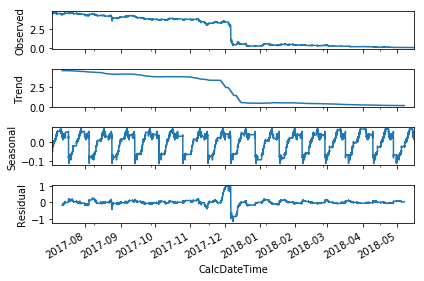

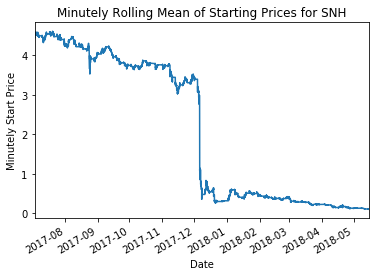

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


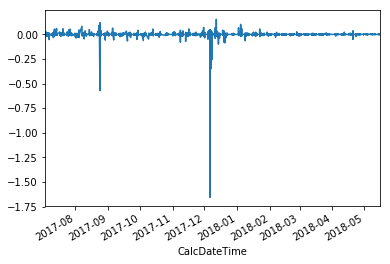

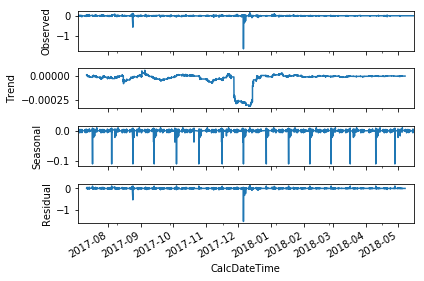

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


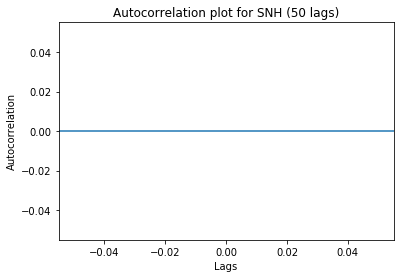

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


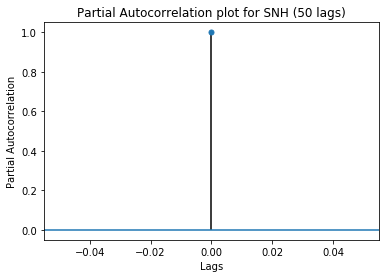

(-44.911134893988525, 0.0, 74, 156381, {'1%': -3.4303918171475027, '5%': -2.8615584825974802, '10%': -2.566779837627094}, -1203629.9836112326)
Generated Rolling Means in:90.729201
Ticker DBK has 156457 records.


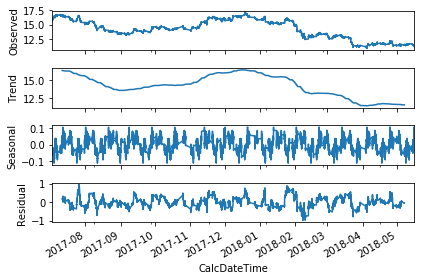

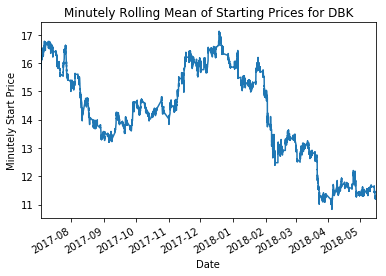

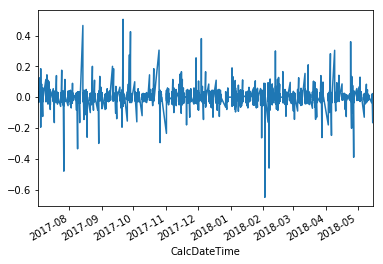

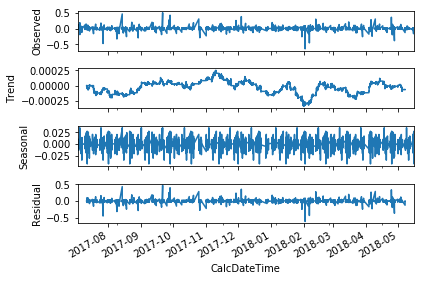

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


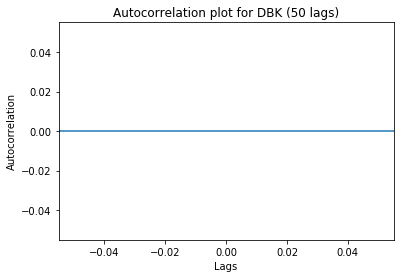

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


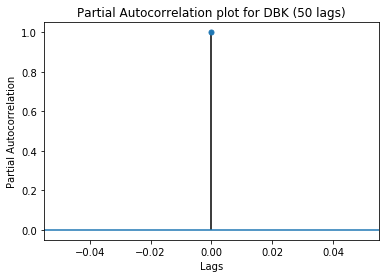

(-105.75747119633782, 0.0, 13, 156442, {'1%': -3.430391800841857, '5%': -2.8615584753906624, '10%': -2.566779833791153}, -1012734.6496906774)
Generated Rolling Means in:85.528066
Ticker EOAN has 156457 records.


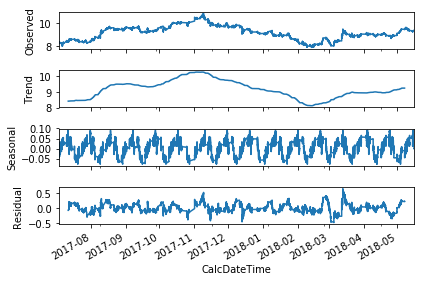

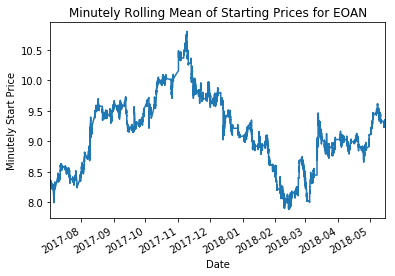

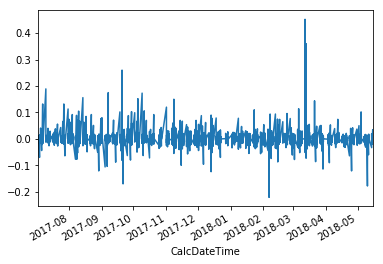

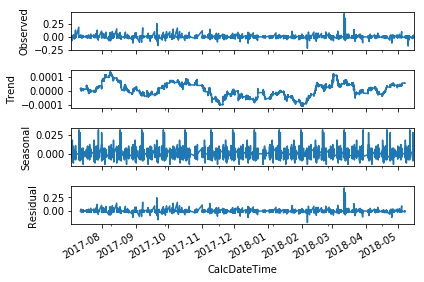

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


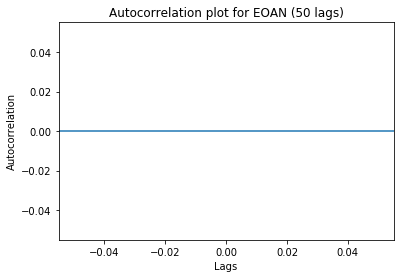

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


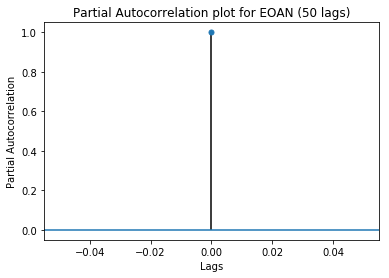

(-49.57368086573893, 0.0, 62, 156393, {'1%': -3.43039181393883, '5%': -2.8615584811793013, '10%': -2.566779836872246}, -1196665.61293155)
Generated Rolling Means in:85.523127
Ticker DTE has 156457 records.


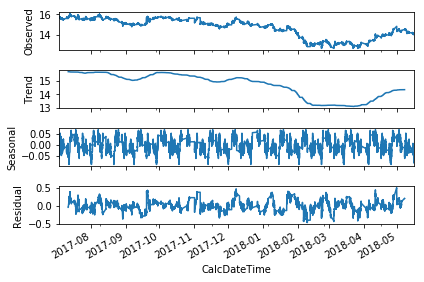

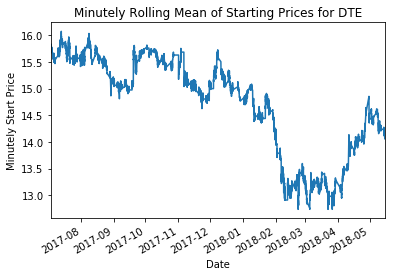

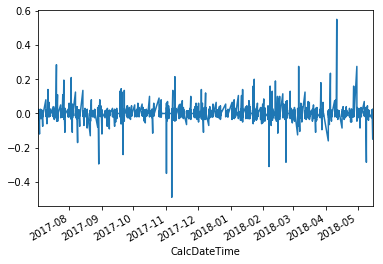

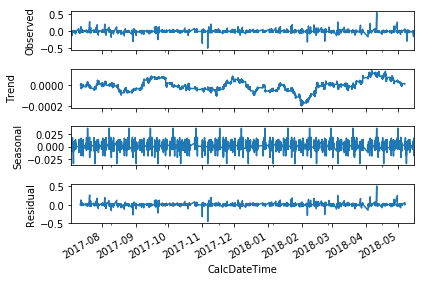

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


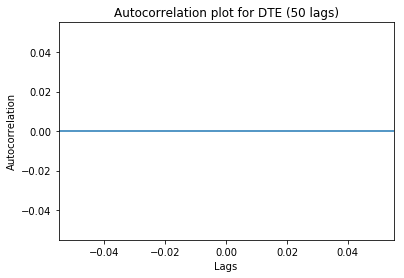

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


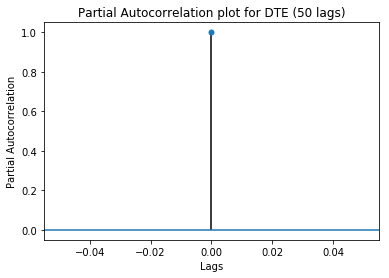

(-164.92174288327965, 0.0, 5, 156450, {'1%': -3.4303917987043544, '5%': -2.861558474445923, '10%': -2.5667798332883005}, -1130069.7625856712)
Generated Rolling Means in:85.733506
Ticker CBK has 156457 records.


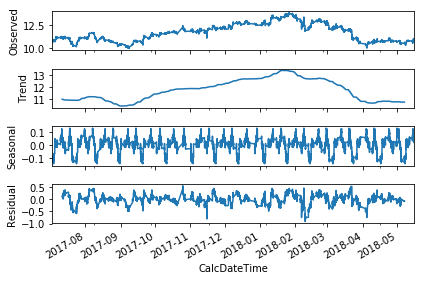

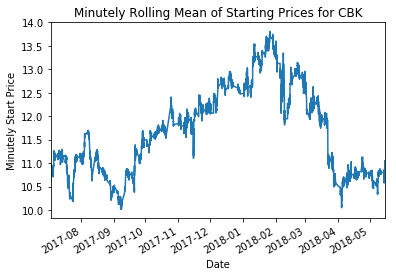

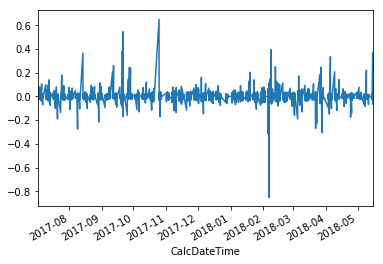

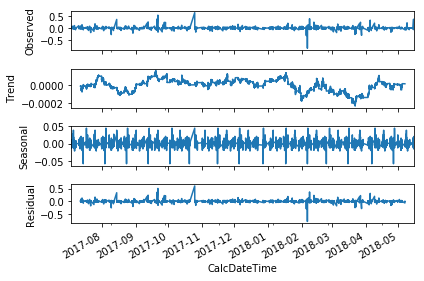

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


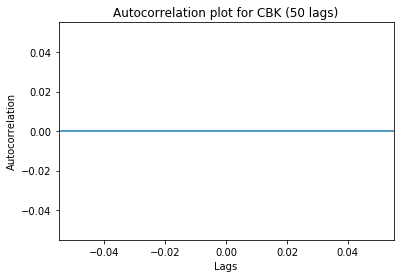

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


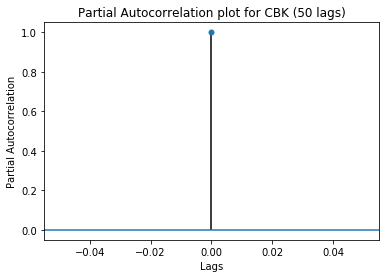

(-69.23412165408716, 0.0, 33, 156422, {'1%': -3.430391806186569, '5%': -2.861558477752934, '10%': -2.566779835048509}, -1061749.2552338163)
Generated Rolling Means in:85.268008
Ticker RWE has 156457 records.


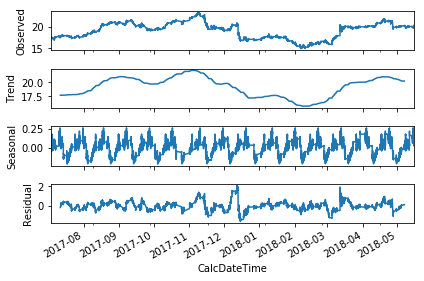

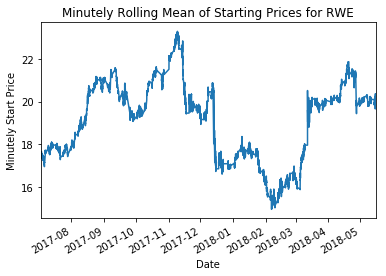

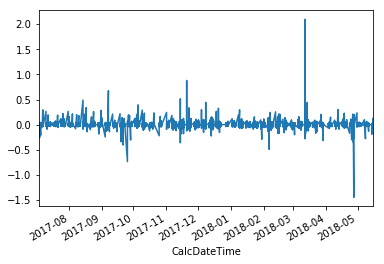

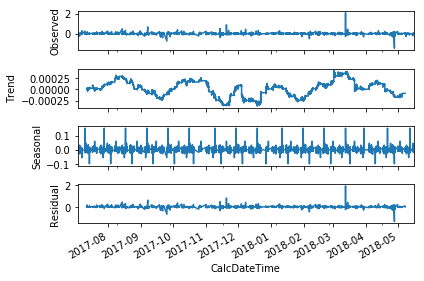

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


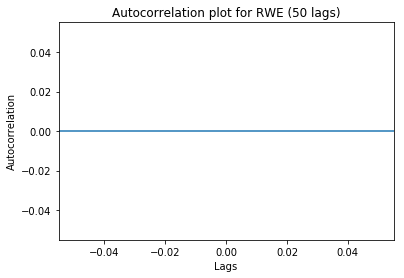

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


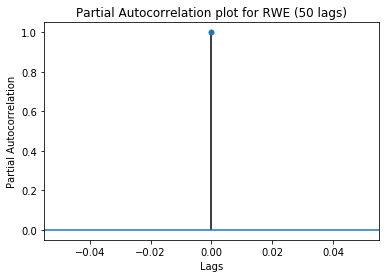

(-49.00404389427348, 0.0, 67, 156388, {'1%': -3.430391815275717, '5%': -2.861558481770183, '10%': -2.566779837186752}, -879018.9844299854)
Generated Rolling Means in:86.047199
Ticker IFX has 156457 records.


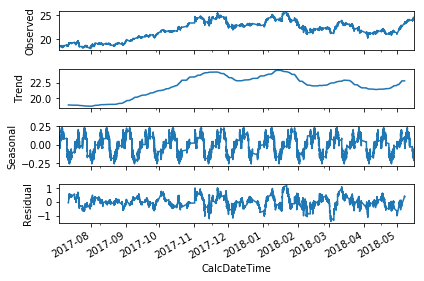

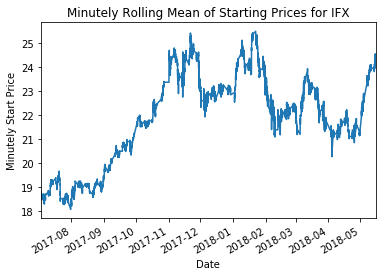

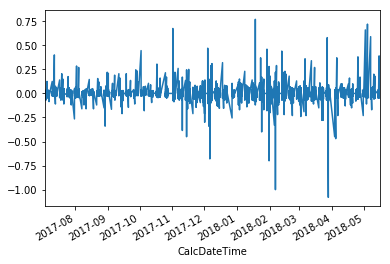

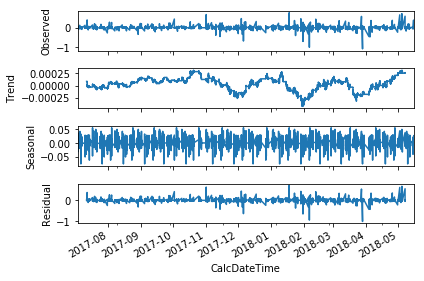

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


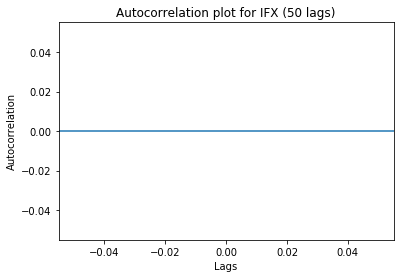

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


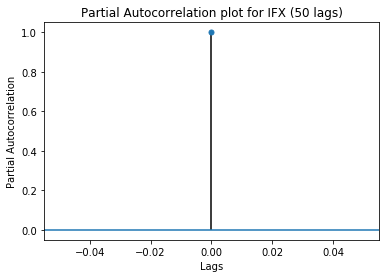

(-66.17750868900721, 0.0, 36, 156419, {'1%': -3.4303918069883936, '5%': -2.861558478107327, '10%': -2.56677983523714}, -874851.6500157554)
Generated Rolling Means in:86.169521
Ticker SVAB has 156446 records.


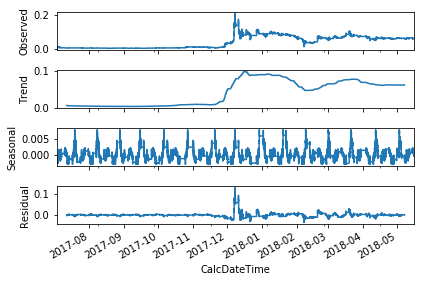

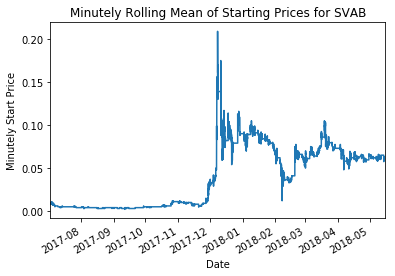

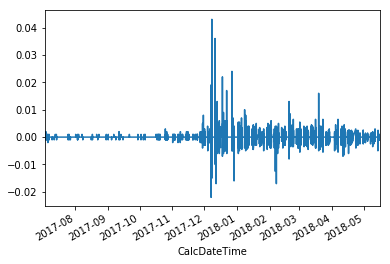

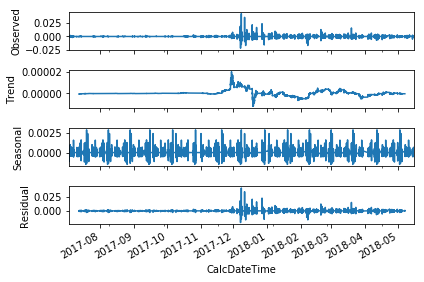

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


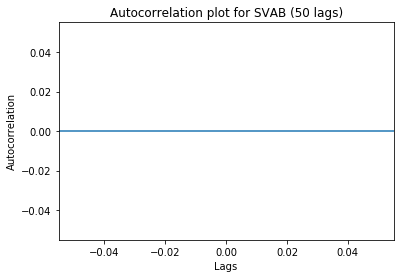

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


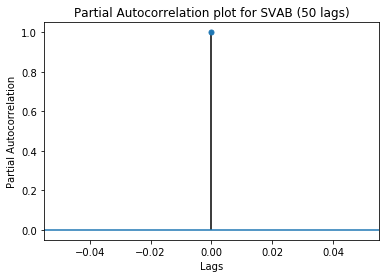

(-48.25796484973348, 0.0, 76, 156368, {'1%': -3.430391820624121, '5%': -2.861558484134086, '10%': -2.566779838444976}, -1948562.3349606348)
Generated Rolling Means in:87.183469
Ticker LHA has 156457 records.


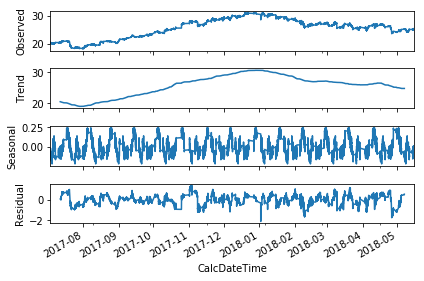

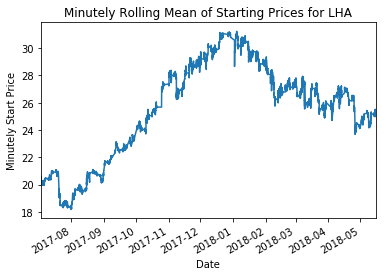

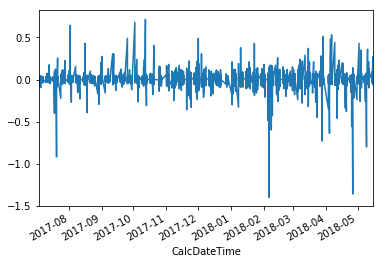

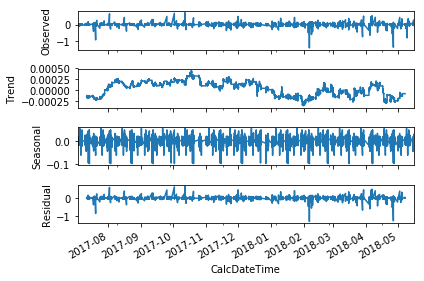

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


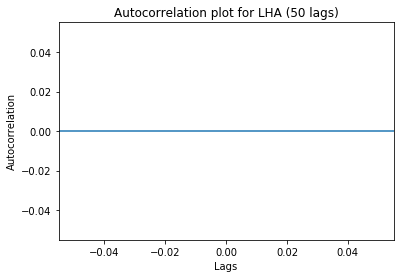

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


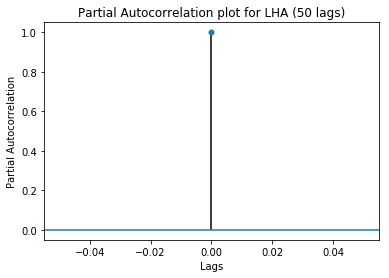

(-55.82142966286708, 0.0, 53, 156402, {'1%': -3.430391811532648, '5%': -2.8615584801158103, '10%': -2.566779836306186}, -815372.6867765355)
Generated Rolling Means in:84.400334
Ticker DAI has 156457 records.


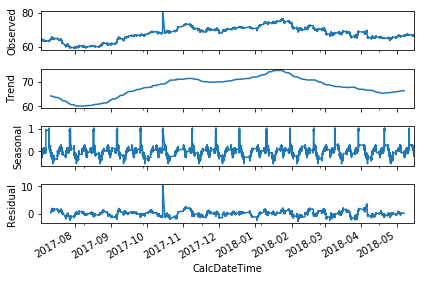

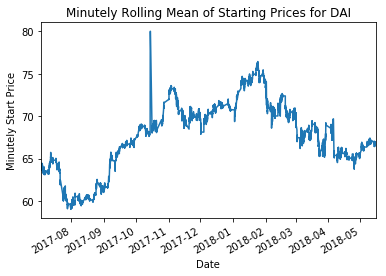

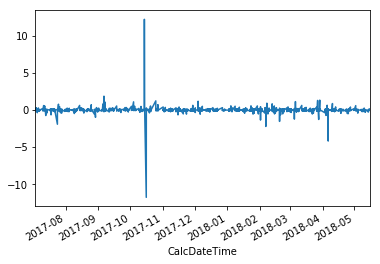

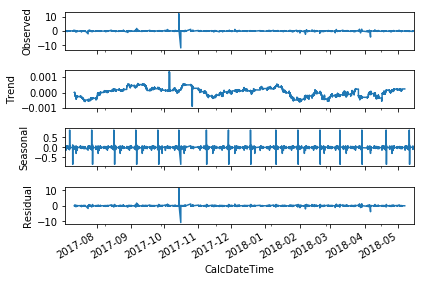

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


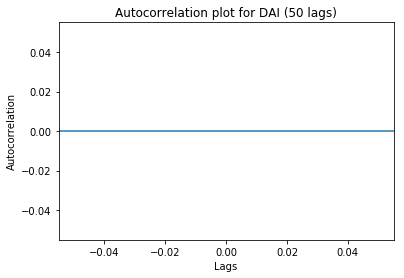

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


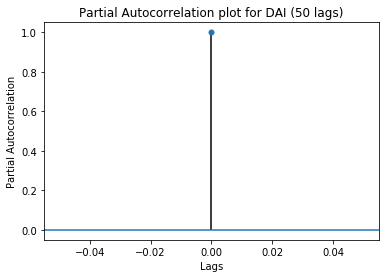

(-398.49120532358376, 0.0, 0, 156455, {'1%': -3.4303917973685265, '5%': -2.8615584738555095, '10%': -2.566779832974044}, -471581.6112942466)
Generated Rolling Means in:83.609883
Ticker O2D has 156455 records.


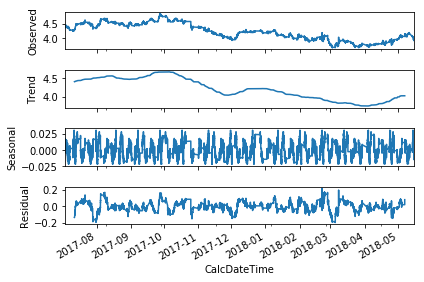

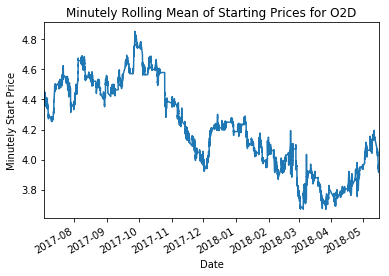

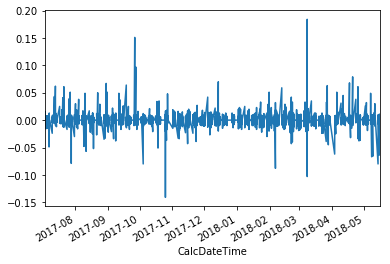

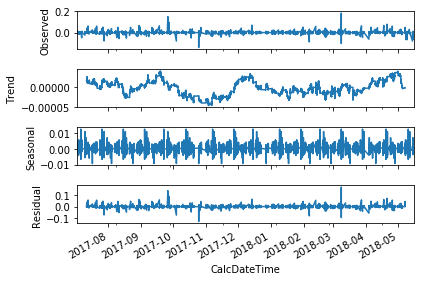

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


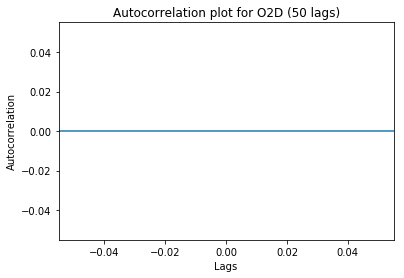

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


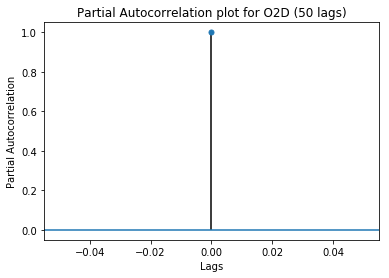

(-49.47109441643375, 0.0, 65, 156388, {'1%': -3.430391815275717, '5%': -2.861558481770183, '10%': -2.566779837186752}, -1459805.311566112)
Generated Rolling Means in:86.28414
Ticker TKA has 156457 records.


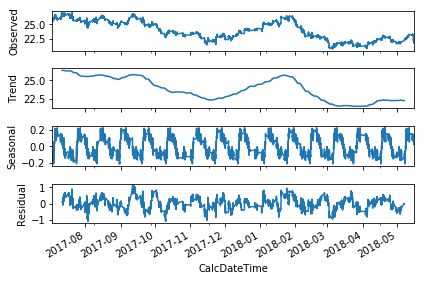

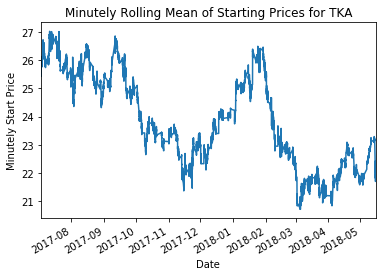

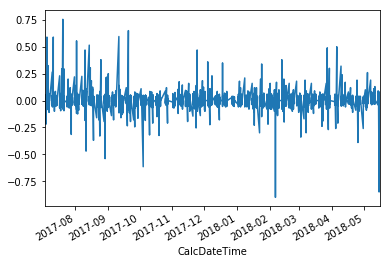

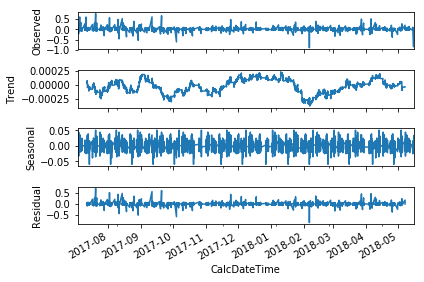

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


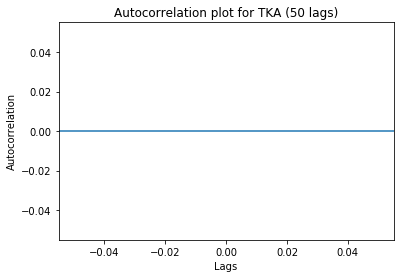

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


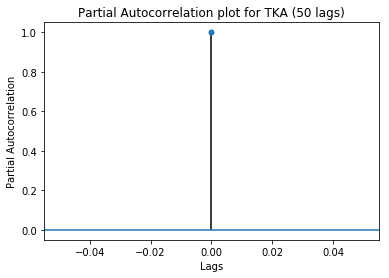

(-84.34544565519482, 0.0, 22, 156433, {'1%': -3.430391803246808, '5%': -2.86155847645361, '10%': -2.566779834356923}, -883330.0363168766)
Generated Rolling Means in:81.958756
Ticker DPW has 156457 records.


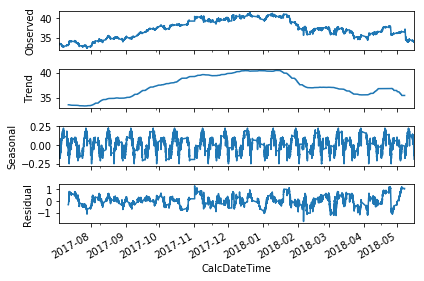

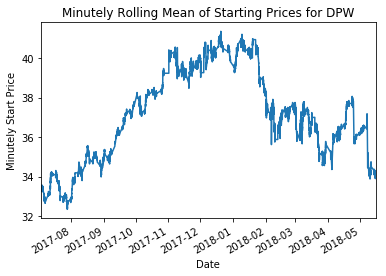

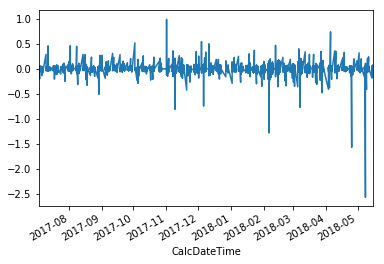

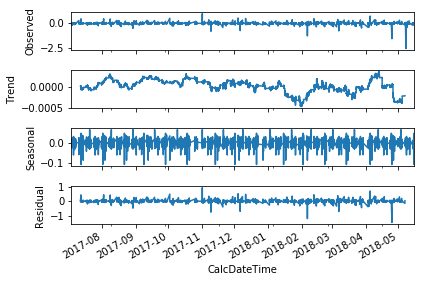

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


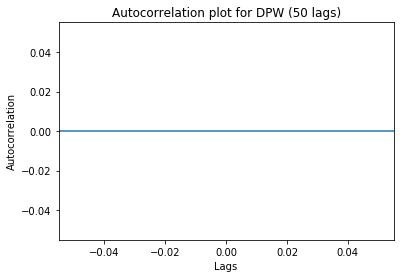

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


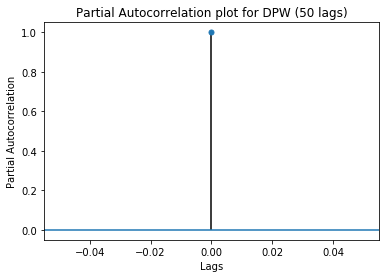

(-53.51832544145098, 0.0, 55, 156400, {'1%': -3.430391812067331, '5%': -2.861558480352131, '10%': -2.5667798364319716}, -810924.887584776)
Generated Rolling Means in:83.378766
Ticker SIE has 156457 records.


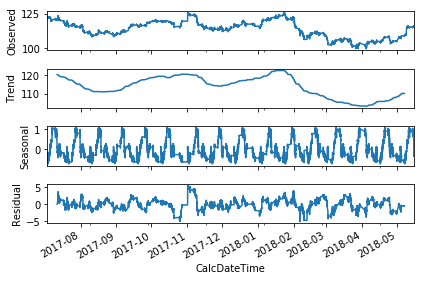

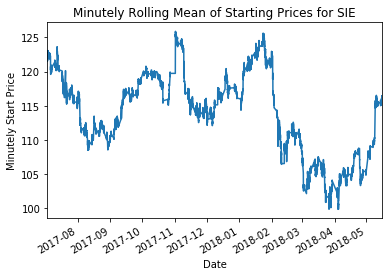

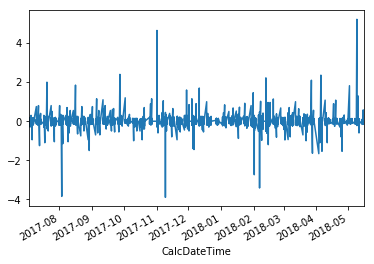

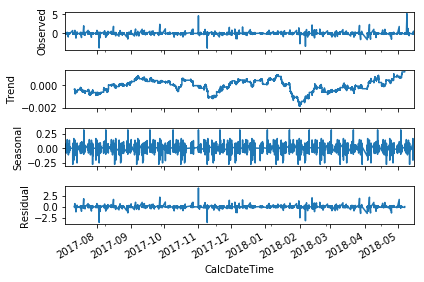

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


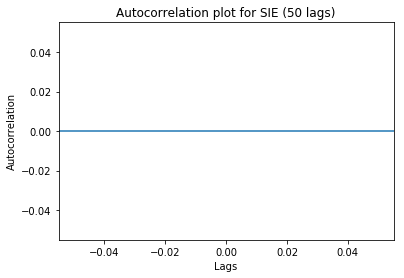

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


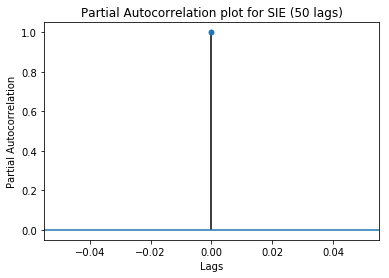

(-86.17609469867446, 0.0, 21, 156434, {'1%': -3.4303918029795777, '5%': -2.8615584763354986, '10%': -2.5667798342940564}, -459392.17535905854)
Generated Rolling Means in:83.67875
Ticker HDD has 156457 records.


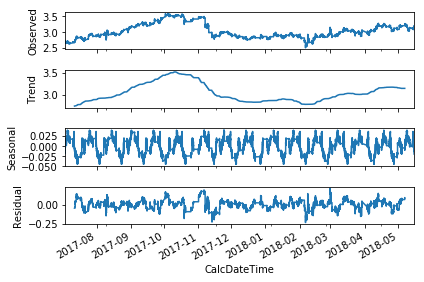

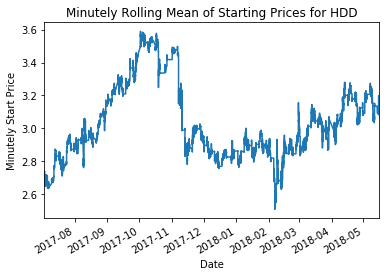

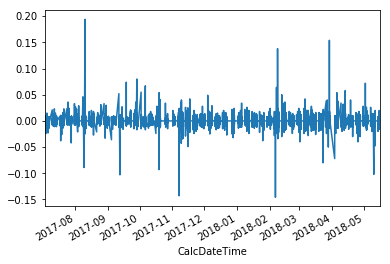

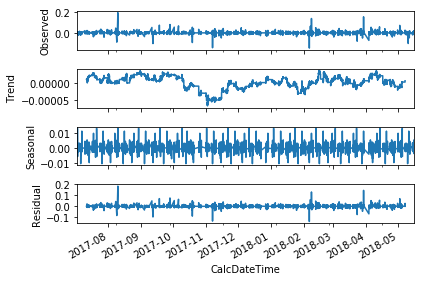

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


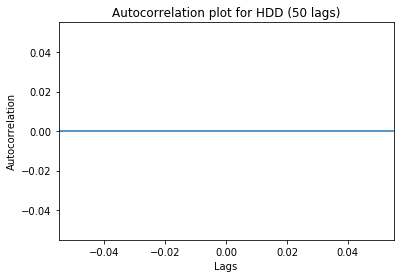

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


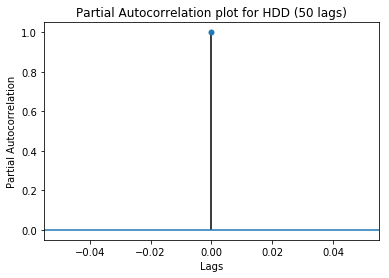

(-50.449194273963, 0.0, 64, 156391, {'1%': -3.430391814473574, '5%': -2.8615584814156496, '10%': -2.566779836998046}, -1433659.3410611255)
Generated Rolling Means in:86.950615
Ticker BAYN has 156457 records.


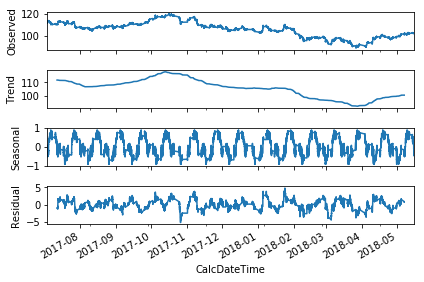

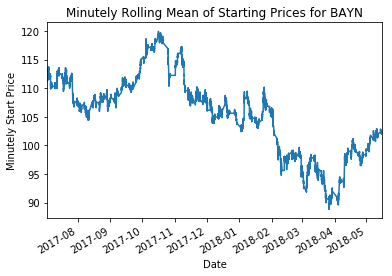

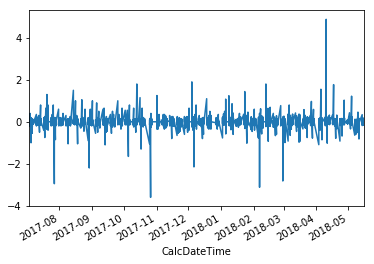

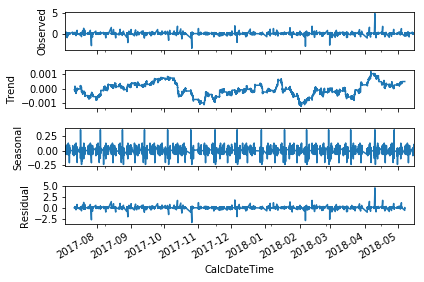

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


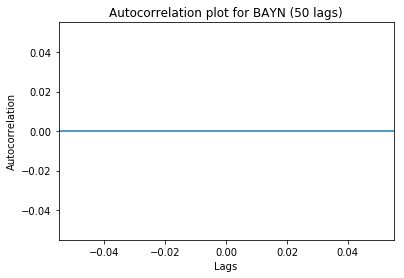

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


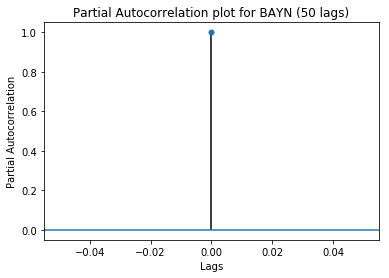

(-72.58499569010179, 0.0, 29, 156426, {'1%': -3.4303918051175173, '5%': -2.8615584772804317, '10%': -2.566779834797012}, -490004.12952075235)
Generated Rolling Means in:82.724502
Ticker AIXA has 156457 records.


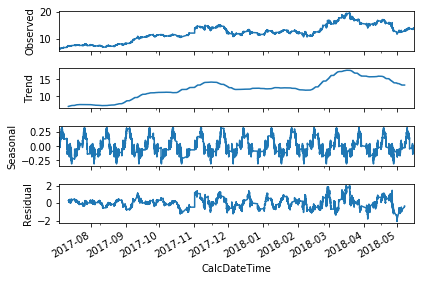

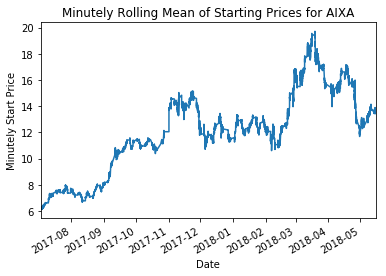

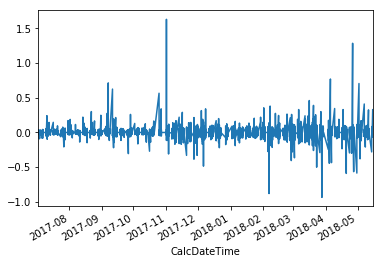

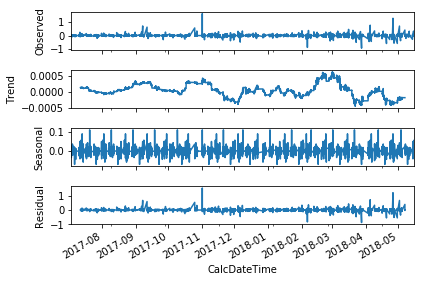

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


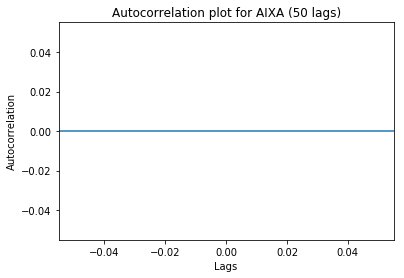

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


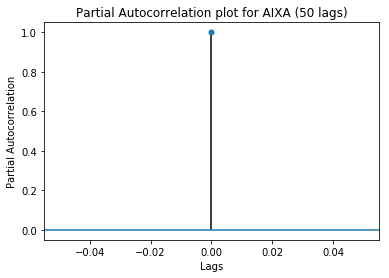

(-63.1870786965681, 0.0, 39, 156416, {'1%': -3.430391807790249, '5%': -2.8615584784617334, '10%': -2.5667798354257783}, -813476.1269176687)
Generated Rolling Means in:84.330744
Ticker SAP has 156457 records.


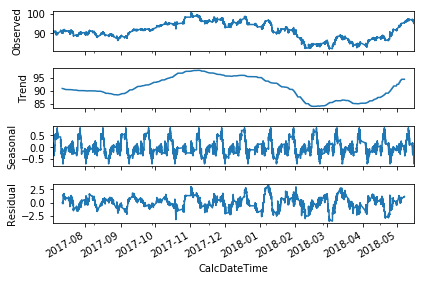

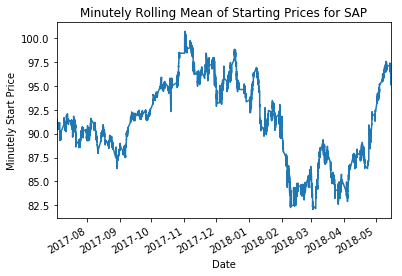

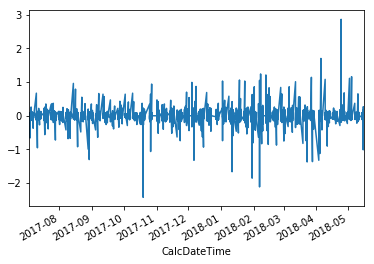

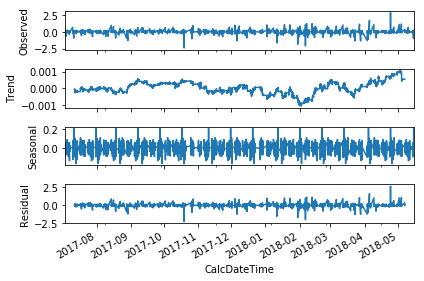

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


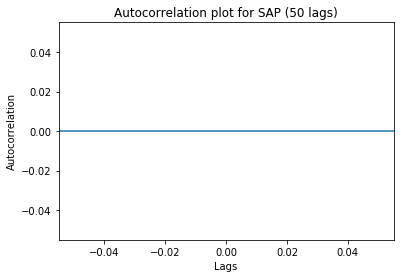

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


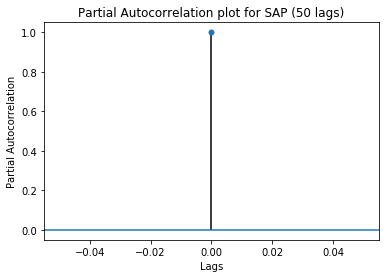

(-59.22124997730268, 0.0, 45, 156410, {'1%': -3.4303918093940524, '5%': -2.8615584791705873, '10%': -2.5667798358030764}, -568466.7428104825)
Generated Rolling Means in:85.04866
Ticker BAS has 156457 records.


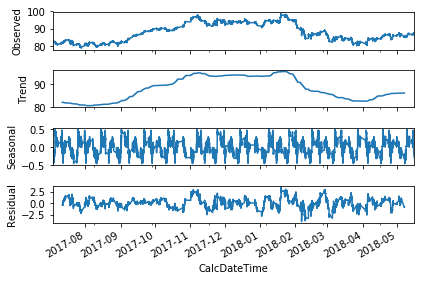

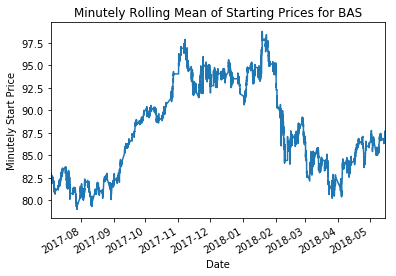

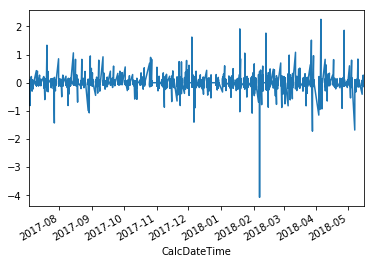

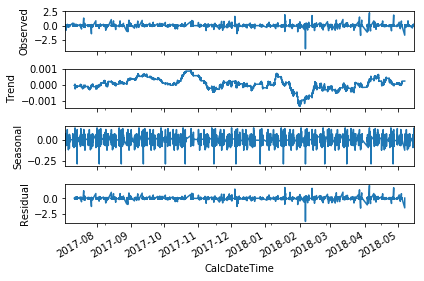

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


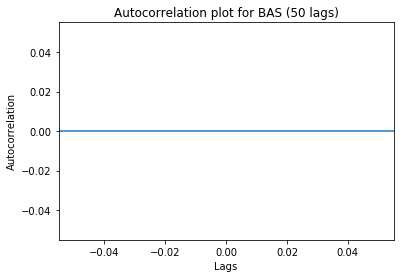

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


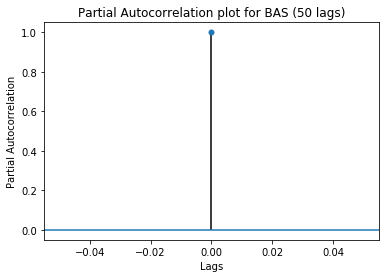

(-66.5519697969675, 0.0, 35, 156420, {'1%': -3.4303918067211154, '5%': -2.8615584779891945, '10%': -2.566779835174262}, -560756.9483580702)
Generated Rolling Means in:84.840296
Ticker EVT has 156457 records.


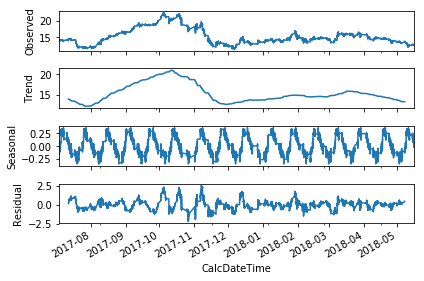

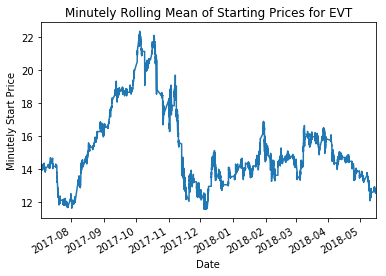

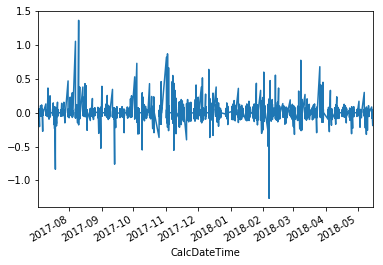

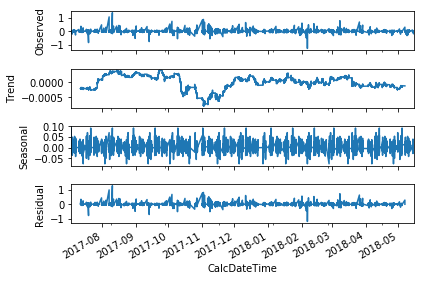

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


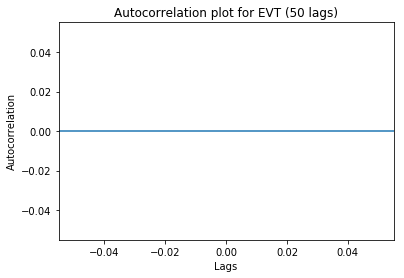

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


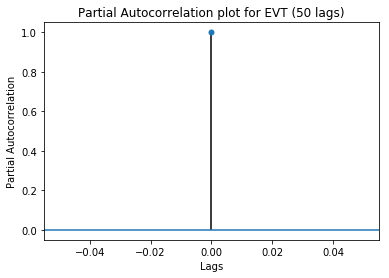

(-71.88833918139805, 0.0, 30, 156425, {'1%': -3.430391805384775, '5%': -2.861558477398555, '10%': -2.5667798348598847}, -780916.0511710517)
Generated Rolling Means in:84.259781
Ticker AT1 has 156391 records.


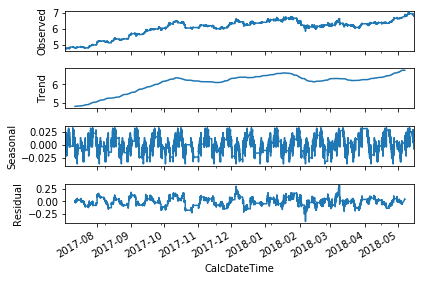

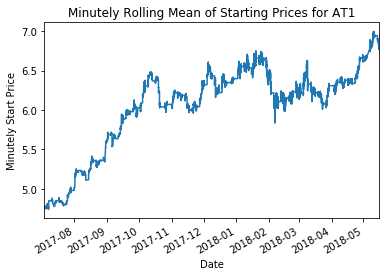

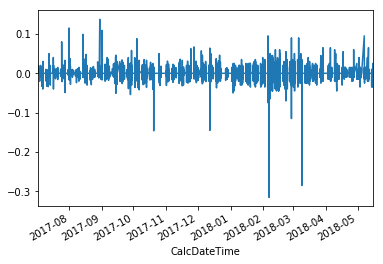

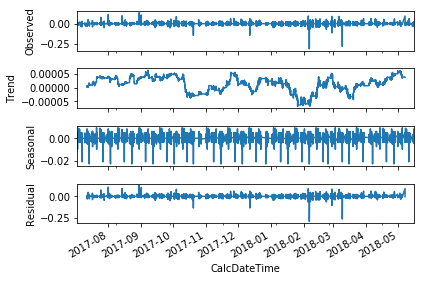

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


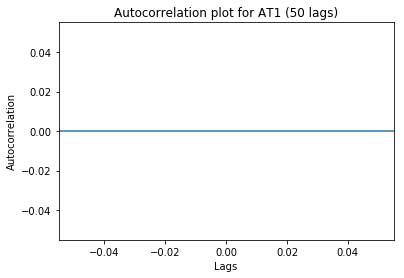

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


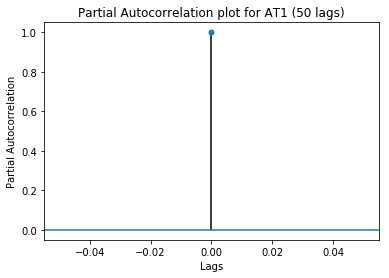

Generated Rolling Means in:14.419647
Ticker PSM has 156457 records.


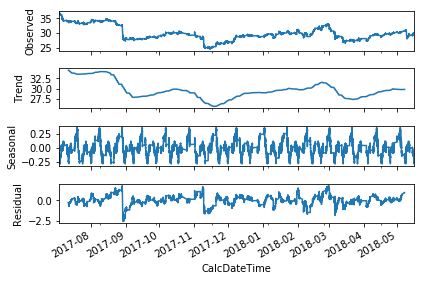

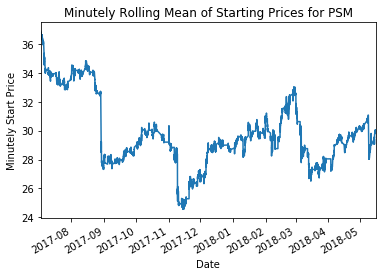

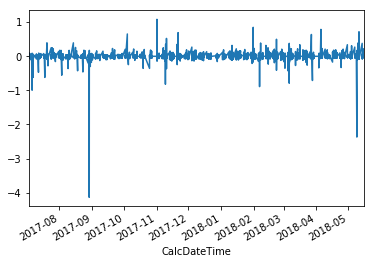

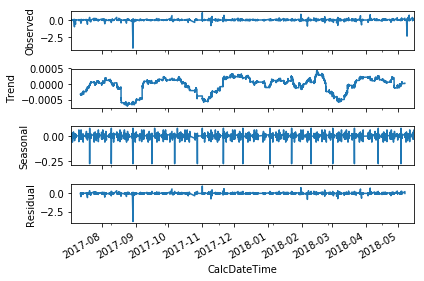

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


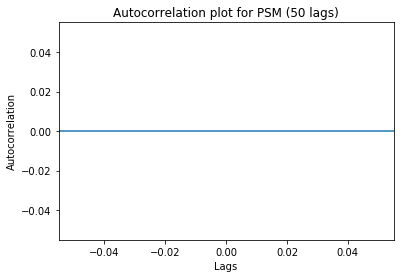

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


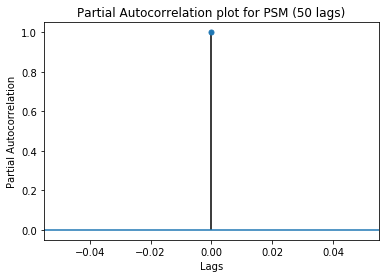

(-67.01621105682676, 0.0, 35, 156420, {'1%': -3.4303918067211154, '5%': -2.8615584779891945, '10%': -2.566779835174262}, -751683.080898699)
Generated Rolling Means in:84.221074
Ticker BMW has 156457 records.


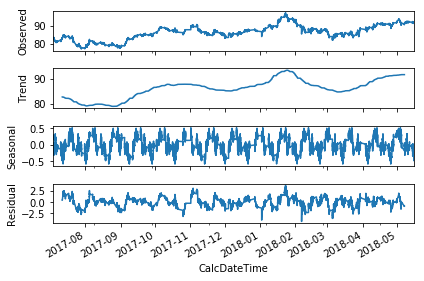

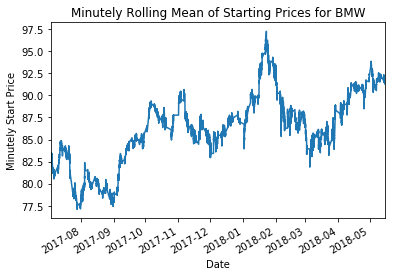

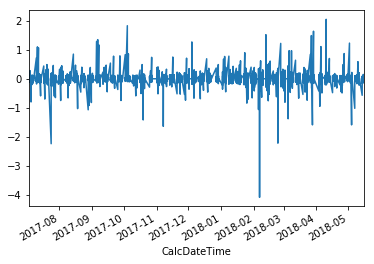

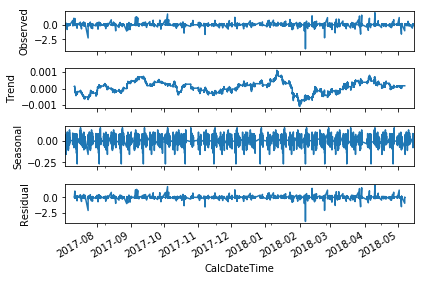

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


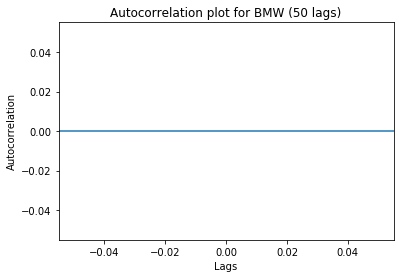

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


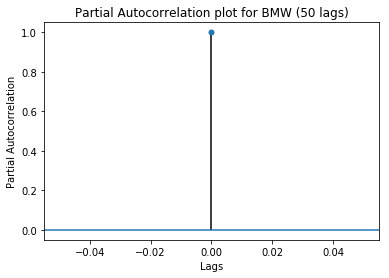

(-62.73096541643303, 0.0, 40, 156415, {'1%': -3.430391808057541, '5%': -2.8615584785798722, '10%': -2.566779835488659}, -548604.1296910624)
Generated Rolling Means in:83.74113
Ticker VOW3 has 156457 records.


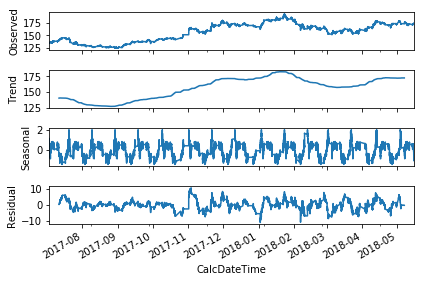

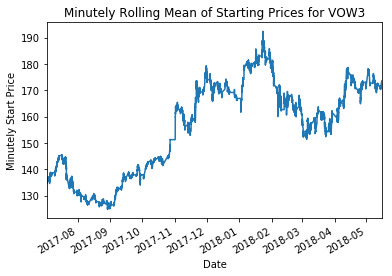

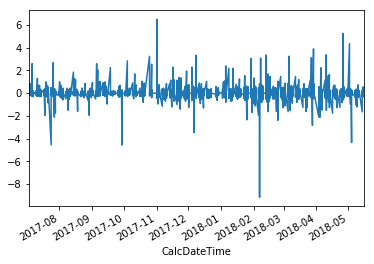

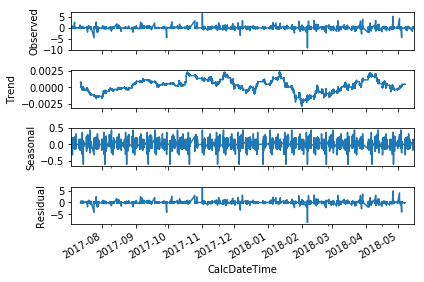

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


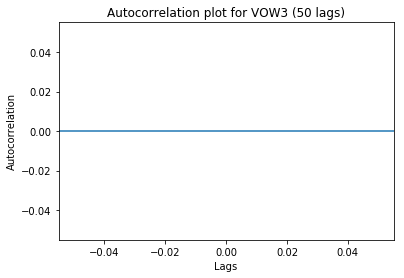

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


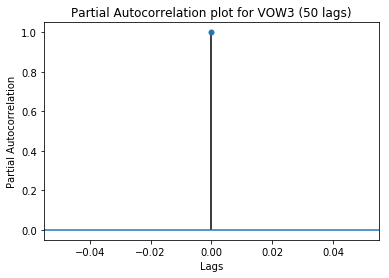

(-68.5460071333646, 0.0, 32, 156423, {'1%': -3.430391805919301, '5%': -2.8615584776348064, '10%': -2.5667798349856334}, -281983.3174696921)
Generated Rolling Means in:83.718729
Ticker FRE has 156457 records.


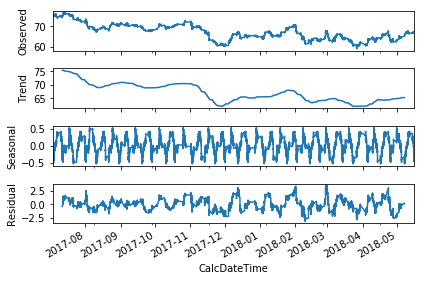

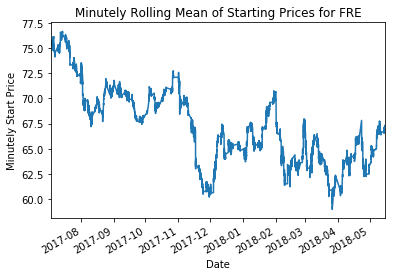

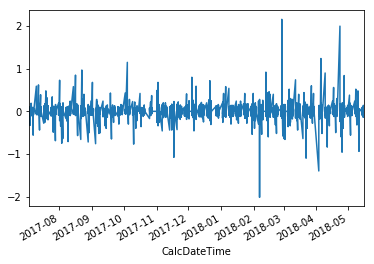

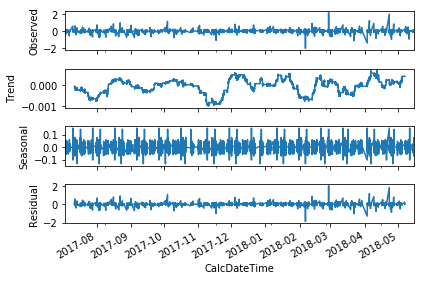

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


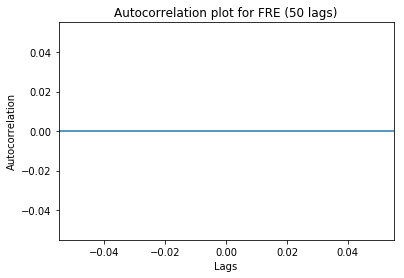

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


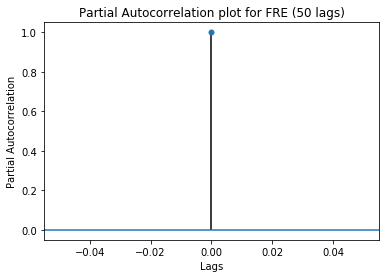

(-71.52268340935991, 0.0, 29, 156426, {'1%': -3.4303918051175173, '5%': -2.8615584772804317, '10%': -2.566779834797012}, -635989.384231679)
Generated Rolling Means in:83.052659
Ticker SDF has 156456 records.


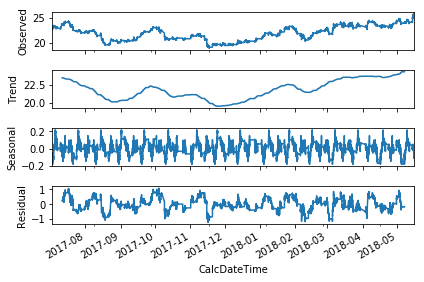

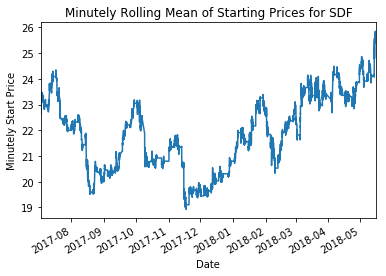

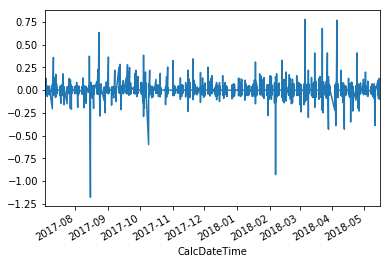

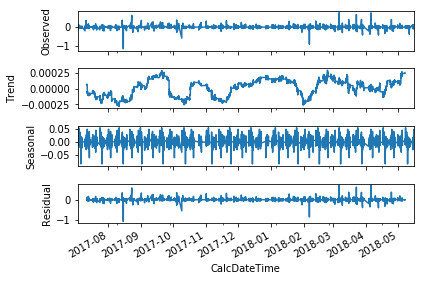

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


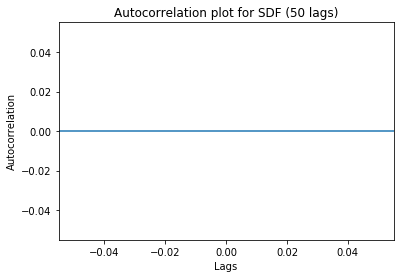

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


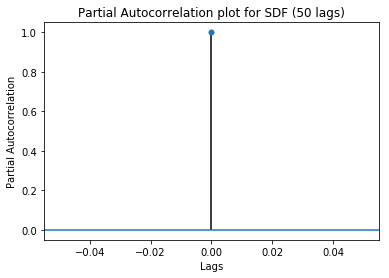

(-58.406365571503336, 0.0, 46, 156408, {'1%': -3.4303918099286808, '5%': -2.861558479406884, '10%': -2.566779835928849}, -894639.554616245)
Generated Rolling Means in:83.114623
Ticker ALV has 156457 records.


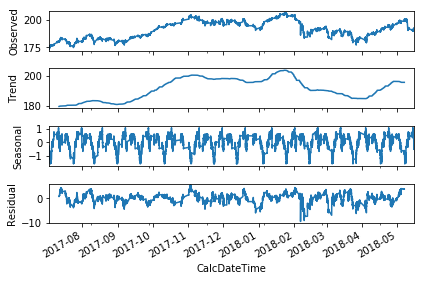

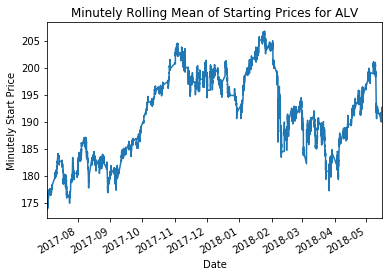

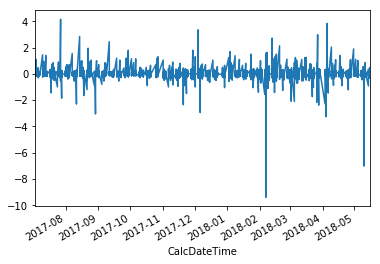

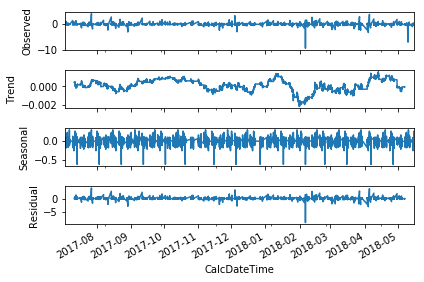

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


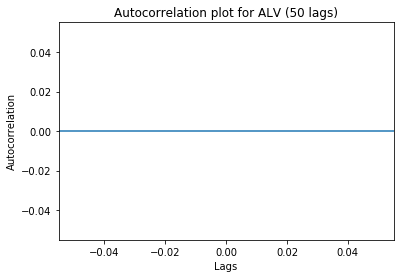

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


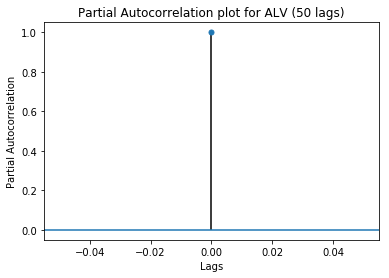

(-63.688401444043386, 0.0, 40, 156415, {'1%': -3.430391808057541, '5%': -2.8615584785798722, '10%': -2.566779835488659}, -345243.59682015865)
Generated Rolling Means in:83.174516
Ticker CEC has 150688 records.


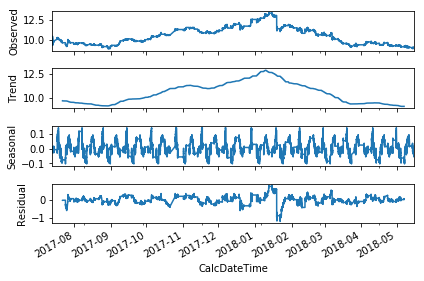

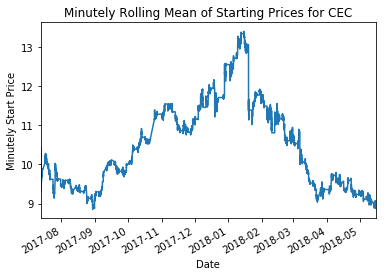

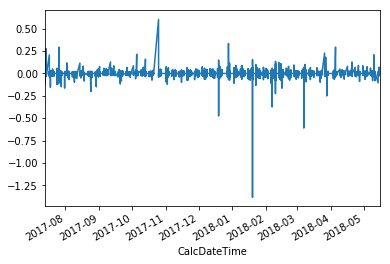

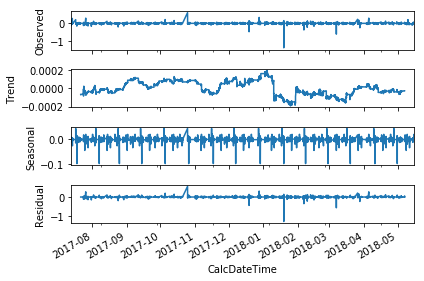

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


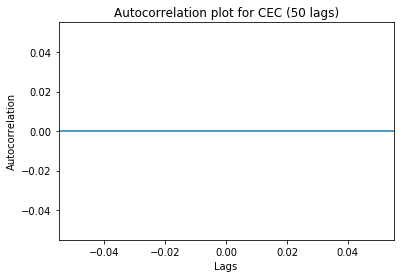

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


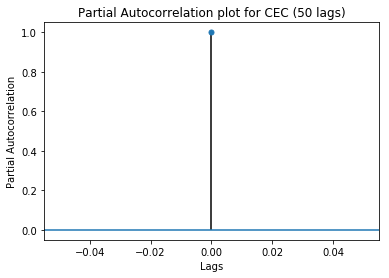

(-43.822260210588084, 0.0, 75, 150611, {'1%': -3.4303934192154366, '5%': -2.86155919068404, '10%': -2.5667802145172045}, -1027794.2777605408)
Generated Rolling Means in:77.565242
Ticker GAZ has 156457 records.


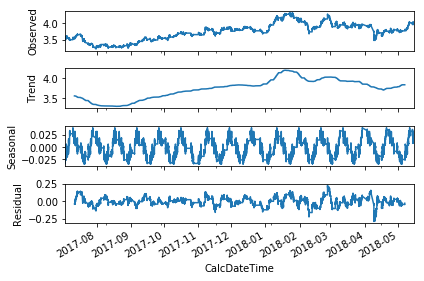

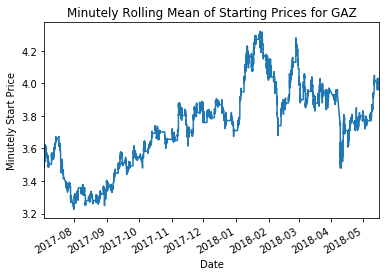

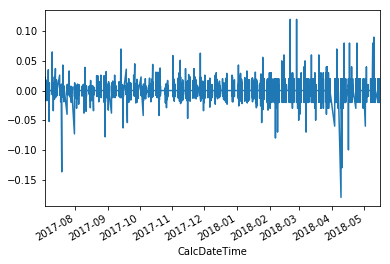

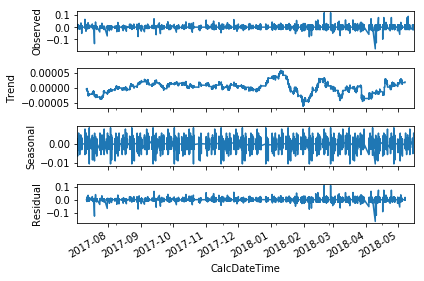

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


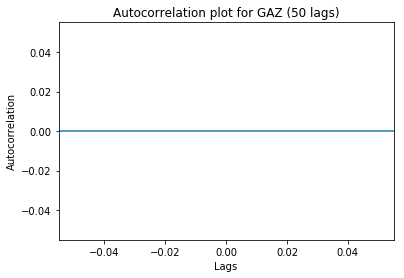

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


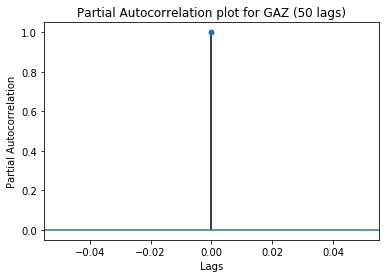

(-47.80954779798333, 0.0, 71, 156384, {'1%': -3.4303918163452884, '5%': -2.861558482242915, '10%': -2.566779837438371}, -1398633.022069715)
Generated Rolling Means in:86.153571
Ticker VNA has 156457 records.


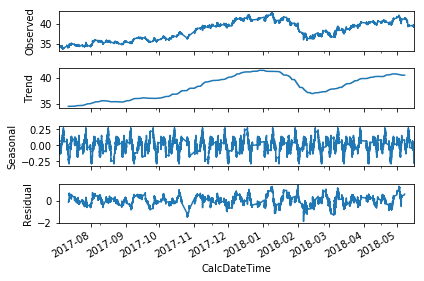

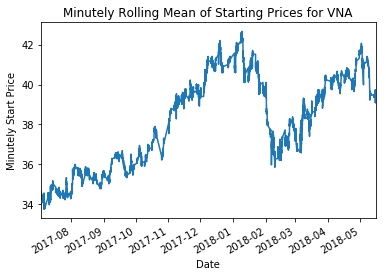

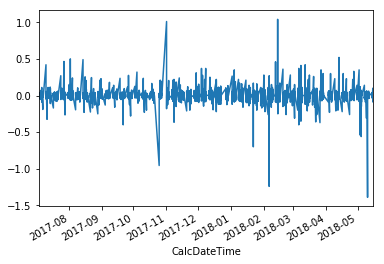

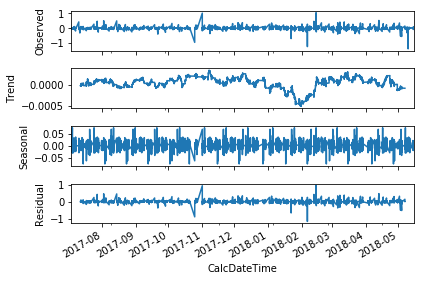

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


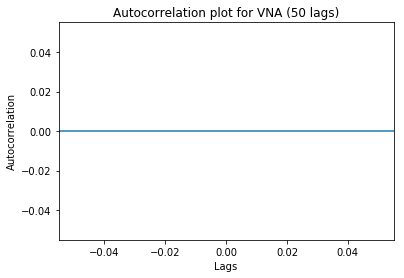

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


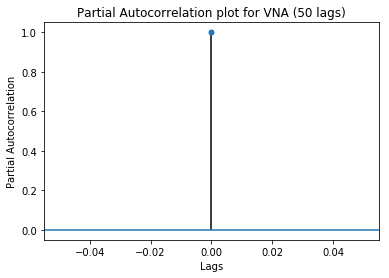

(-68.09141683011111, 0.0, 33, 156422, {'1%': -3.430391806186569, '5%': -2.861558477752934, '10%': -2.566779835048509}, -830654.190082037)
Generated Rolling Means in:84.573375
Ticker B4B has 150689 records.


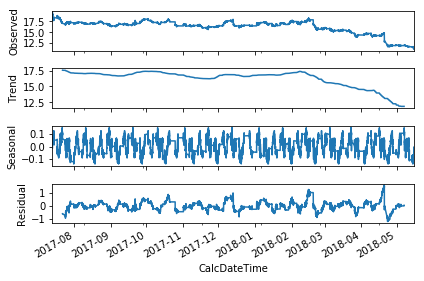

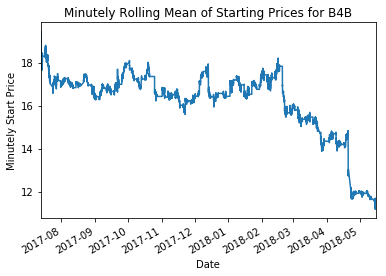

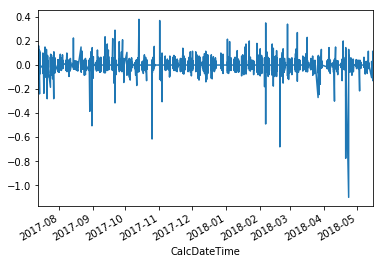

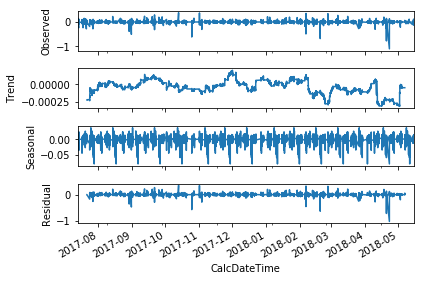

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


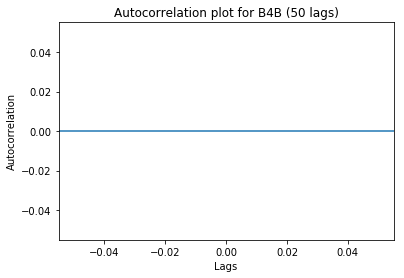

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


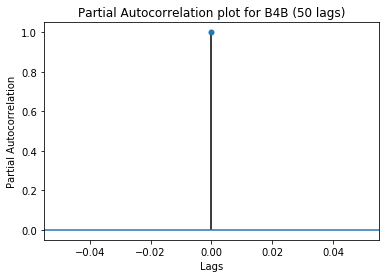

(-60.98050195275501, 0.0, 40, 150647, {'1%': -3.430393408839403, '5%': -2.8615591860980123, '10%': -2.5667802120762193}, -918961.7354403483)
Generated Rolling Means in:78.617887
Ticker SHA has 156457 records.


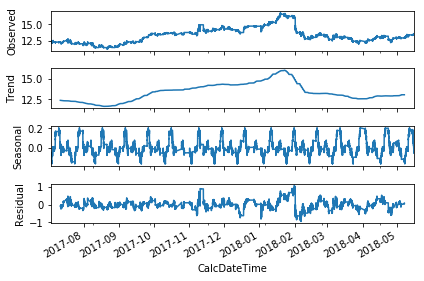

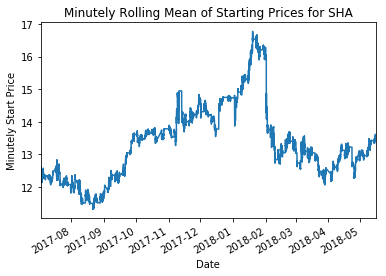

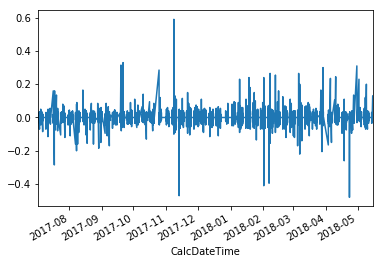

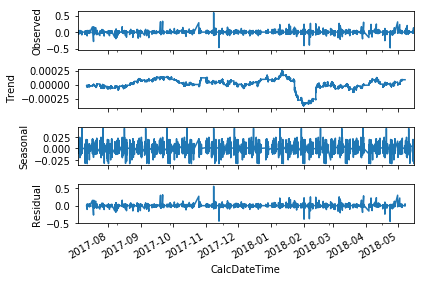

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


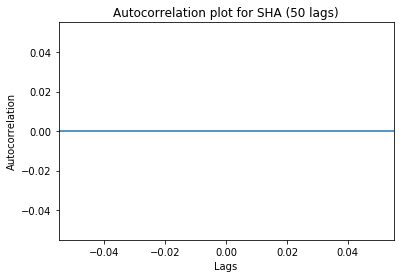

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


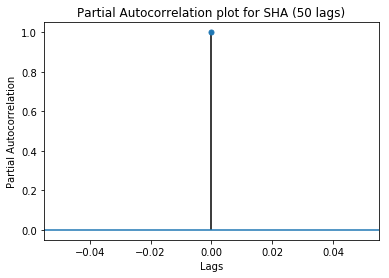

(-59.05857944090816, 0.0, 41, 156414, {'1%': -3.4303918083248366, '5%': -2.861558478698012, '10%': -2.566779835551541}, -1012261.3593914178)
Generated Rolling Means in:84.962963
Ticker AB1 has 156441 records.


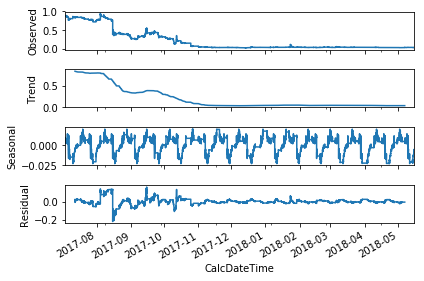

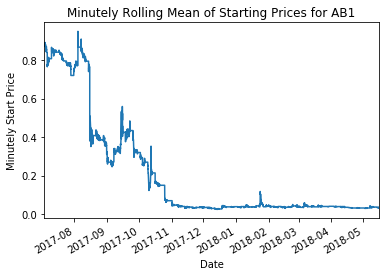

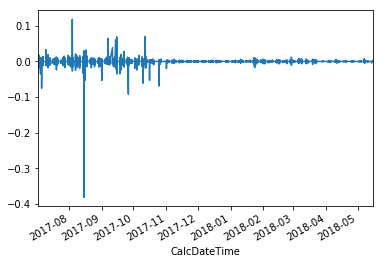

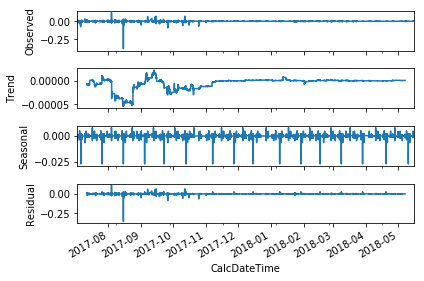

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


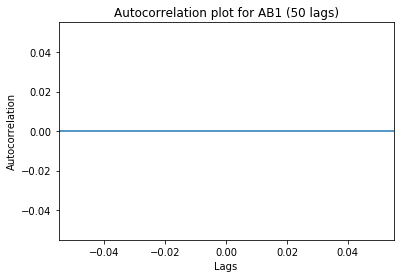

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


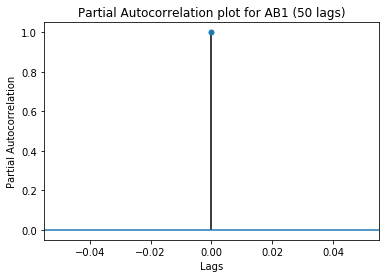

(-50.252448268278926, 0.0, 74, 156365, {'1%': -3.4303918214264995, '5%': -2.861558484488724, '10%': -2.5667798386337375}, -1589307.0578695505)
Generated Rolling Means in:86.647632
Ticker DLG has 156457 records.


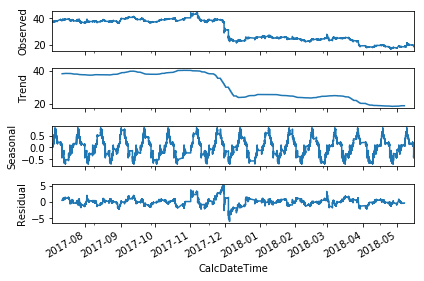

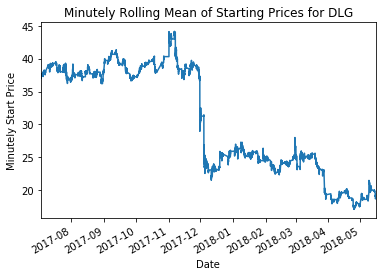

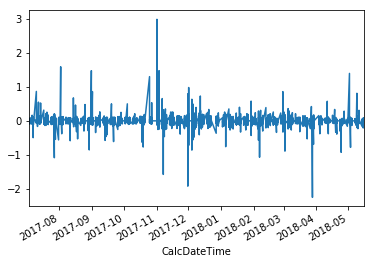

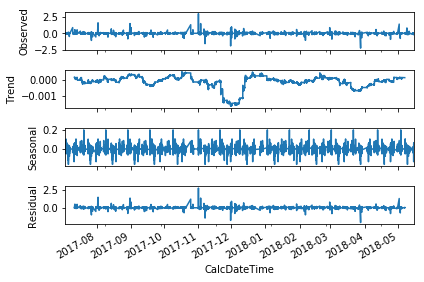

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


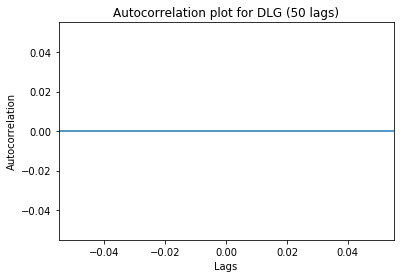

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


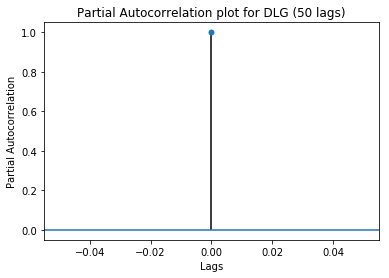

(-46.858726462530996, 0.0, 73, 156382, {'1%': -3.4303918168800944, '5%': -2.8615584824792903, '10%': -2.5667798375641855}, -637304.723017586)
Generated Rolling Means in:86.171074
Ticker NDX1 has 156457 records.


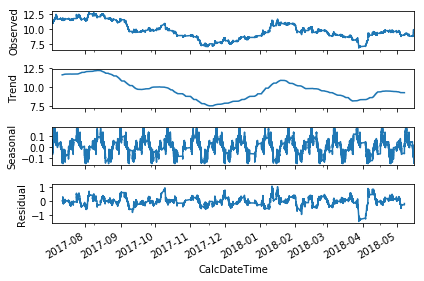

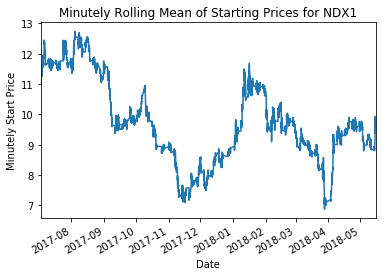

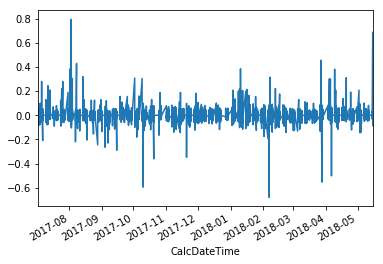

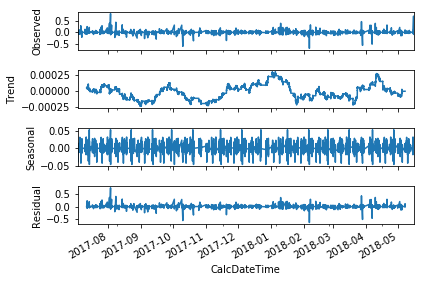

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


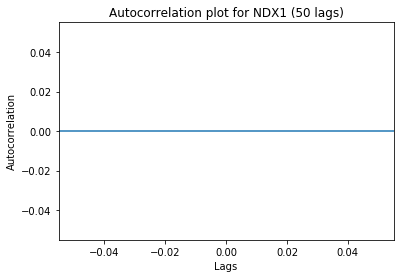

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


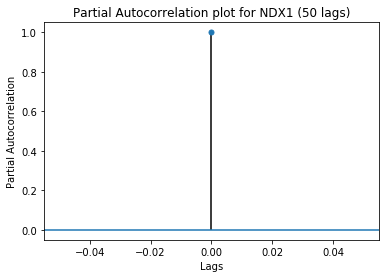

(-52.696933498510816, 0.0, 55, 156400, {'1%': -3.430391812067331, '5%': -2.861558480352131, '10%': -2.5667798364319716}, -957611.8418152928)
Generated Rolling Means in:83.653358
Ticker UN01 has 156457 records.


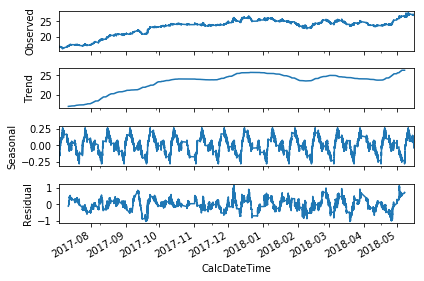

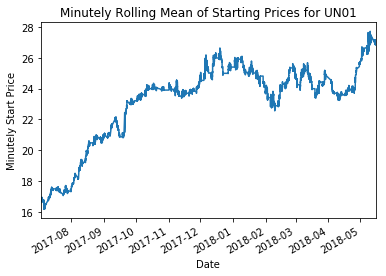

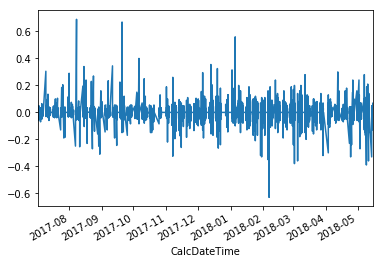

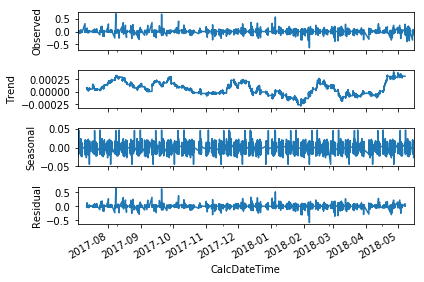

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


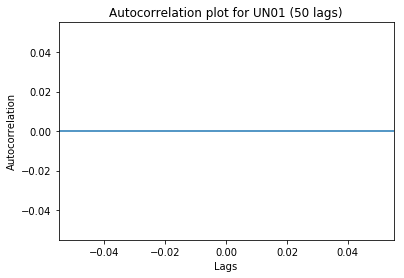

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


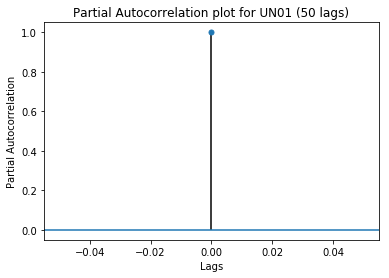

(-74.75272144163038, 0.0, 31, 156424, {'1%': -3.4303918056520364, '5%': -2.86155847751668, '10%': -2.566779834922759}, -894446.9579703948)
Generated Rolling Means in:83.859493
Ticker NOA3 has 156455 records.


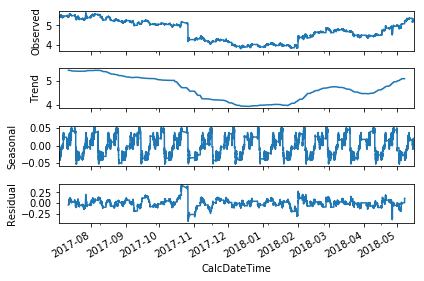

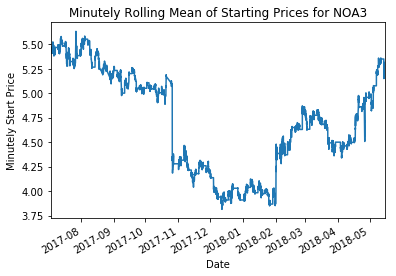

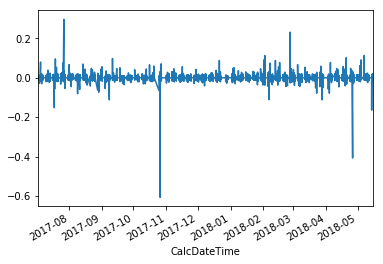

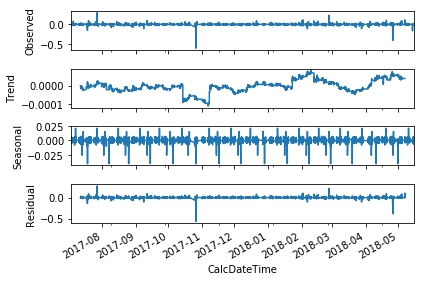

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


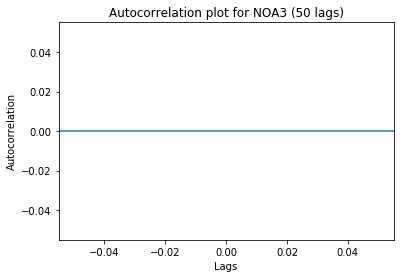

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


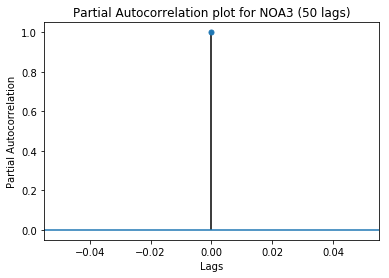

(-51.67468460040366, 0.0, 55, 156398, {'1%': -3.4303918126020276, '5%': -2.861558480588458, '10%': -2.5667798365577603}, -1321900.510095529)
Generated Rolling Means in:84.957178
Ticker IGY has 156454 records.


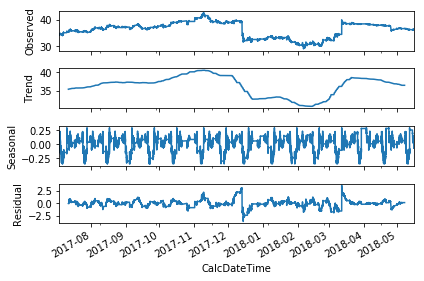

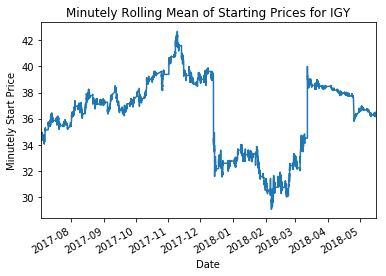

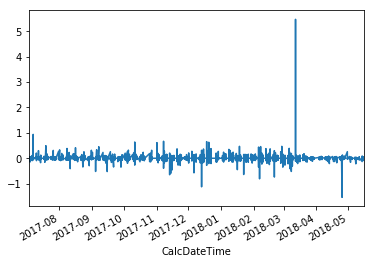

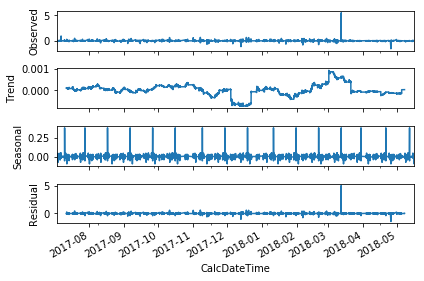

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


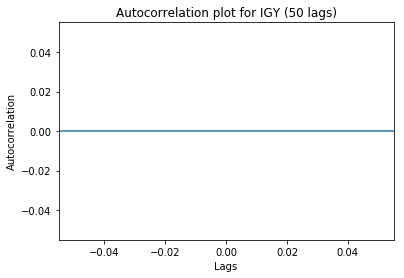

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


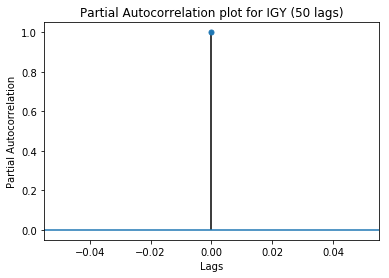

(-60.41949728308553, 0.0, 45, 156407, {'1%': -3.430391810196, '5%': -2.8615584795250344, '10%': -2.5667798359917366}, -719358.6333126853)
Generated Rolling Means in:83.372224
Ticker ADS has 156457 records.


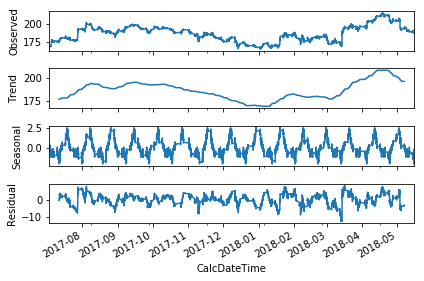

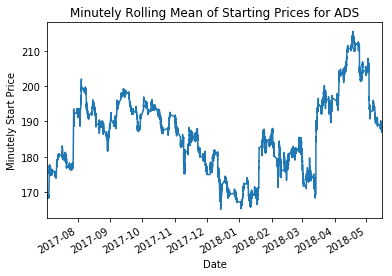

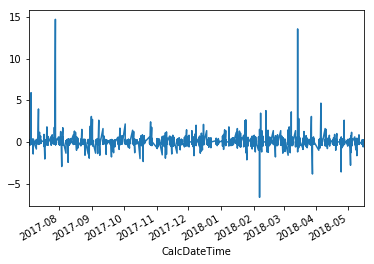

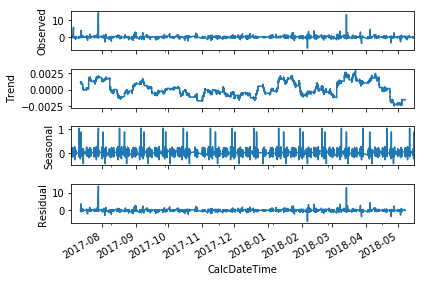

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


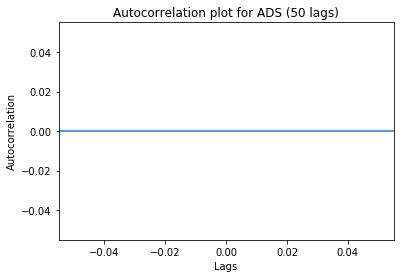

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


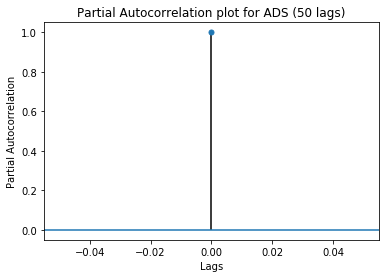

(-60.60256263107795, 0.0, 41, 156414, {'1%': -3.4303918083248366, '5%': -2.861558478698012, '10%': -2.566779835551541}, -251367.3407990781)
Generated Rolling Means in:83.98149
Ticker VODI has 156457 records.


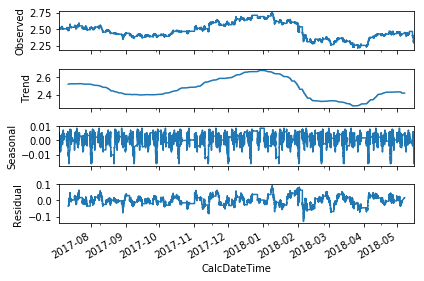

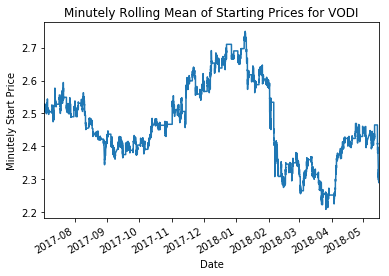

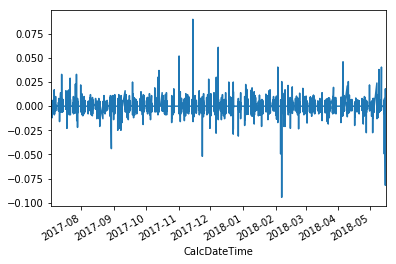

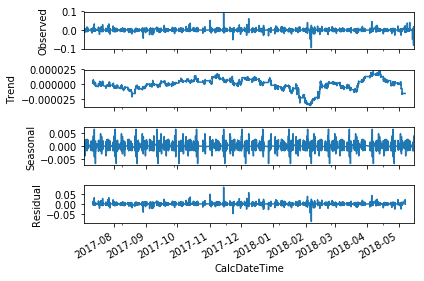

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


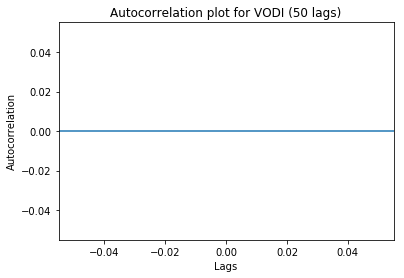

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


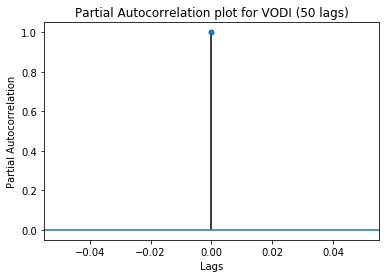

(-48.69535113345623, 0.0, 69, 156386, {'1%': -3.430391815810496, '5%': -2.861558482006546, '10%': -2.5667798373125597}, -1661134.649745761)
Generated Rolling Means in:85.084006
Ticker 1COV has 156457 records.


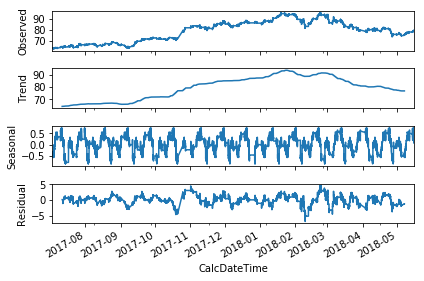

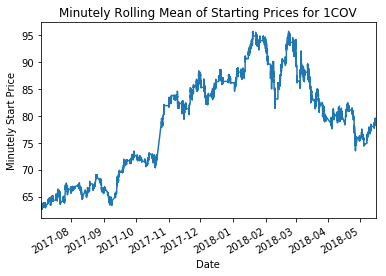

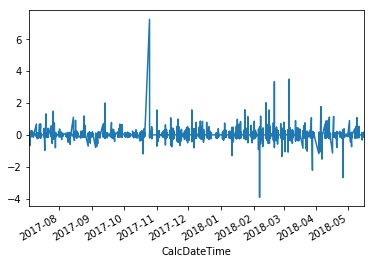

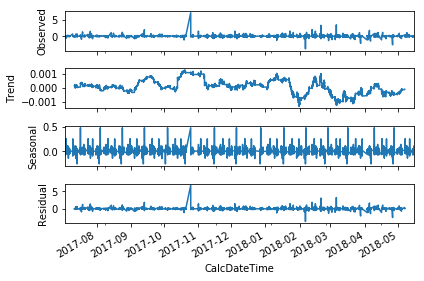

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


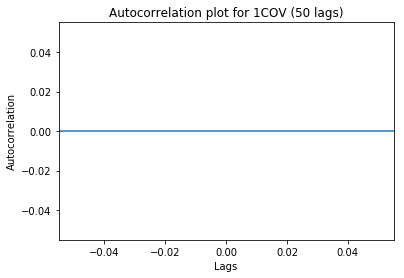

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


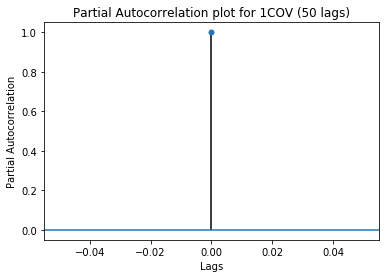

(-50.76820503855704, 0.0, 60, 156395, {'1%': -3.4303918134040985, '5%': -2.8615584809429593, '10%': -2.5667798367464494}, -474540.95289049693)
Generated Rolling Means in:84.833261
Ticker TUI1 has 156457 records.


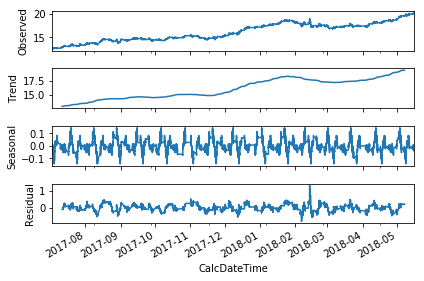

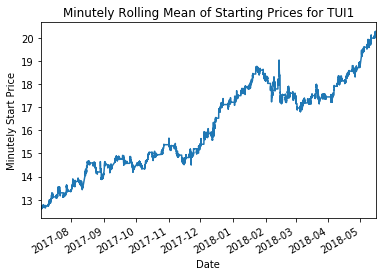

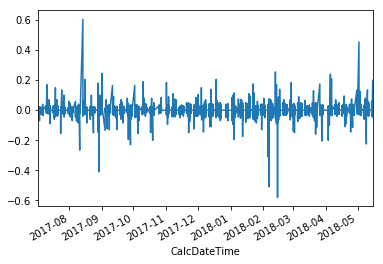

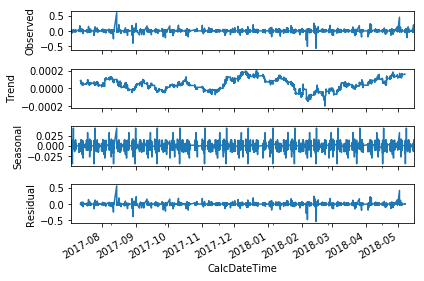

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


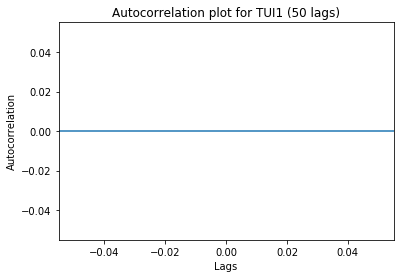

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


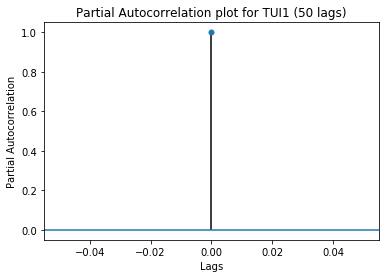

(-115.90169639329962, 0.0, 11, 156444, {'1%': -3.430391800307461, '5%': -2.8615584751544683, '10%': -2.566779833665435}, -1075365.7767526954)
Generated Rolling Means in:84.520318
Ticker BPE5 has 156457 records.


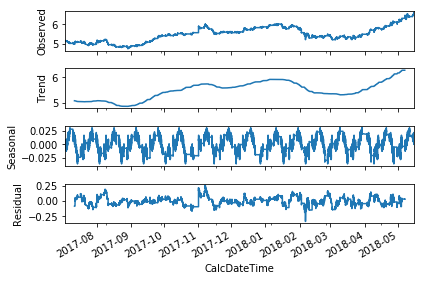

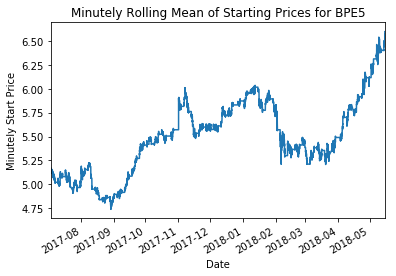

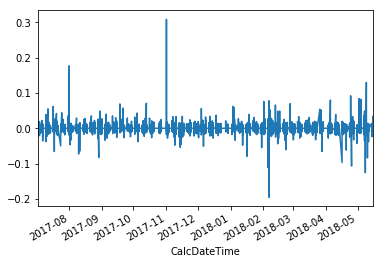

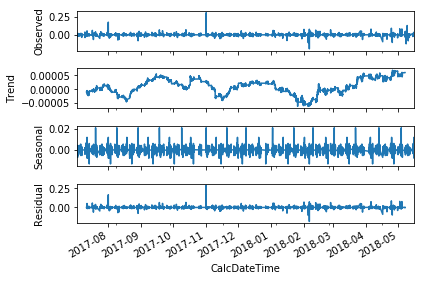

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


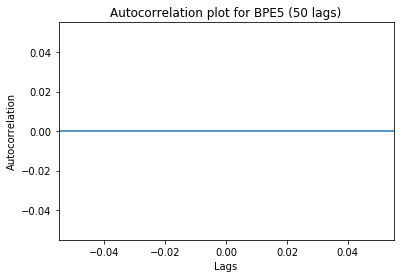

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


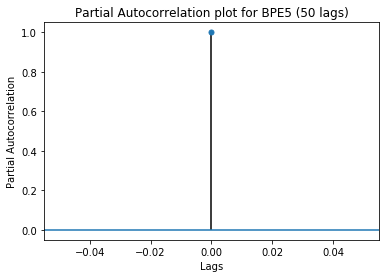

(-94.41345517801851, 0.0, 18, 156437, {'1%': -3.4303918021779065, '5%': -2.8615584759811736, '10%': -2.5667798341054615}, -1416958.585172291)
Generated Rolling Means in:82.314639
Ticker HEI has 156457 records.


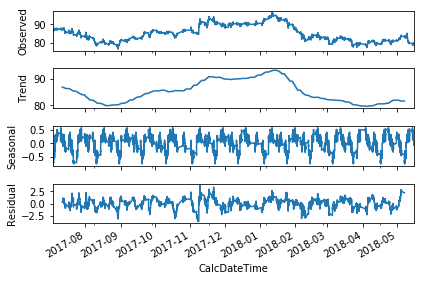

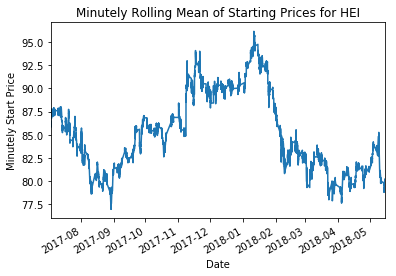

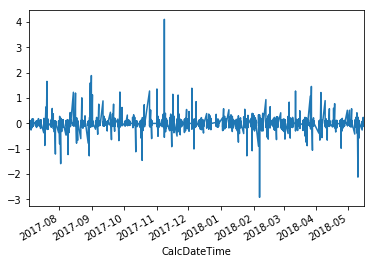

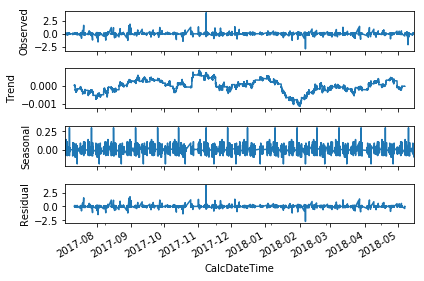

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


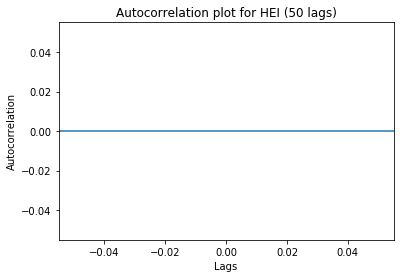

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


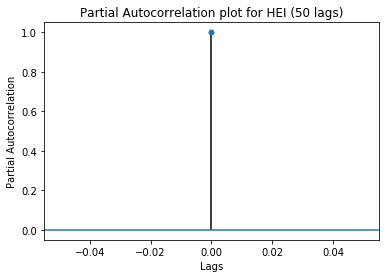

In [0]:
from statsmodels.tsa.arima_model import ARIMA

tickers = ['DBK']
for ticker in volume_series.index:
    start_time = datetime.now()
    ticker_data = df[df['Mnemonic'] == ticker]
    ticker_data.reset_index(inplace=True)

    X = pd.to_numeric(pd.to_datetime(ticker_data['CalcDateTime']))
    X = X.values.reshape(-1, 1)

    Y = ticker_data['StartPrice']
    print("Ticker " + ticker + " has " + str(len(X)) + " records.")


    ticker_data['CalcDateTime'] = pd.to_datetime(ticker_data['CalcDateTime'])
    #ticker_data = ticker_data[['CalcDateTime', 'StartPrice']]
    ticker_data.set_index(ticker_data['CalcDateTime'], inplace=True)
    
    exclude = ['AT1']

#######################################################
#   TIME SERIES ANALYSIS IN PYTHON
#######################################################

    # decomp freq: https://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas
    result = seasonal_decompose(ticker_data.StartPrice, freq=10080)
    trend = result.trend
    result.plot()
    plt.show()
    
#     # ACF Plots
#     pm.plot_acf(ticker_data.StartPrice[0:49])
#     # print(pm.utils.acf(ticker_data.StartPrice[0:49]))
    
#     fig = tsaplots.plot_acf(ticker_data.StartPrice, lags = 20, zero=False)
#     ax = fig.add_subplot(111)
#     ax.set_xlabel('Lags')
#     ax.set_ylabel('Autocorrelation')
#     ax.set_title('Autocorrelation plot for ' + ticker + " (50 lags)" )
#     plt.show()
    
#     # PACF Plots
#     pm.plot_pacf(ticker_data.StartPrice[0:49])
#     # print(pm.utils.pacf(ticker_data.StartPrice[0:49]))
    
#     fig = tsaplots.plot_pacf(ticker_data.StartPrice, lags = 20, zero=False)
#     ax = fig.add_subplot(111)
#     ax.set_xlabel('Lags')
#     ax.set_ylabel('Partial Autocorrelation')
#     ax.set_title('Partial Autocorrelation plot for ' + ticker + " (50 lags)" )
#     plt.show()
    
#     # adfuller test
#     if ticker not in exclude:
#       results = adfuller(ticker_data.StartPrice)
#       print(results)
    
    
#######################################################
#   ROLLING AVERAGES IN PYTHON
#######################################################
    # Normal Plot
    daily_avg = ticker_data.StartPrice
    
    ax = daily_avg.plot()
    ax.set_xlabel('Date')
    ax.set_ylabel('Minutely Start Price')
    ax.set_title('Minutely Rolling Mean of Starting Prices for ' + ticker)
    plt.show()
    
#     # Daily Rolling Averages
#     daily_avg = ticker_data.StartPrice.rolling(window =60*24).mean()
    
#     ax = daily_avg.plot()
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Daily Start Price')
#     ax.set_title('Daily Rolling Mean of Starting Prices for ' + ticker)
#     plt.show()
    
#     # Weekly Rolling Averages
#     weekly_avg = ticker_data.StartPrice.rolling(window =60*24*7).mean()
    
#     ax = weekly_avg.plot()
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Weekly Start Price')
#     ax.set_title('Weekly Rolling Mean of Starting Prices for ' + ticker)
#     plt.show()
    
    
    ticker_data['price_diff'] = ticker_data.StartPrice - ticker_data.StartPrice.shift(1)
    x_diff = ticker_data['price_diff'].dropna()
    x_diff.plot()
    plt.show()
    
    result = seasonal_decompose(x_diff, freq=10080)
    result.plot()
    plt.show()
    
    
    #pm.plot_acf(ticker_data.price_diff[0:49])
    
    fig = tsaplots.plot_acf(ticker_data.price_diff, lags = 20)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Autocorrelation plot for ' + ticker + " (50 lags)" )
    plt.show()
    
    # PACF Plots
    #pm.plot_pacf(ticker_data.price_diff[0:49])
    
    fig = tsaplots.plot_pacf(ticker_data.price_diff, lags = 20)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Partial Autocorrelation')
    ax.set_title('Partial Autocorrelation plot for ' + ticker + " (50 lags)" )
    plt.show()
    
    # adfuller test
    if ticker not in exclude:
      results = adfuller(x_diff)
      print(results)

      
#     if ticker not in exclude:
#       # predict last 15 values since arima on 25% of the data is taking too long
#       train_index = np.arange(0,len(X) - 15)
#       test_index = np.arange(len(X) - 15, len(X))
#       X_train, X_test = X[train_index], X[test_index]
#       y_train, y_test = Y[train_index], Y[test_index]

#       stepwise_model = pm.auto_arima(x)
#       print(stepwise_model.summary())
#       print(stepwise_model.aic())
     
#     p = 3
#     d = 1
#     q = 1

#     model = ARIMA(ticker_data.StartPrice, order=(p,d,q))
#     model_fit = model.fit(disp=0)
#     print(model_fit.summary())
#     # plot residual errors
#     residuals = pd.DataFrame(model_fit.resid)
#     residuals.plot()
#     plt.show()
#     residuals.plot(kind='kde')
#     plt.show()
#     print(residuals.describe())    

#     p = 0
#     d = 1
#     q = 0

#     model = ARIMA(ticker_data.StartPrice, order=(p,d,q))
#     model_fit = model.fit(disp=0)
#     print(model_fit.summary())
#     # plot residual errors
#     residuals = pd.DataFrame(model_fit.resid)
#     residuals.plot()
#     plt.show()
#     residuals.plot(kind='kde')
#     plt.show()
#     print(residuals.describe())    



    end_time = datetime.now()
    c = end_time - start_time
    print("Generated Rolling Means in:" + str(c.total_seconds()))
